# Which features are the most predictive in each modality/model?

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import pylab as plt

from scipy import stats
from statannot import add_stat_annotation
import joblib
from sklearn import inspection

from importlib import reload
import sys
import os
sys.path.insert(1,'../')
import plots

In [5]:
reload(plots)
image_path = plots.set_dir()
colors = plots.set_colors()
data_path = '/scratch/c.c21013066/data/ukbiobank/analyses/acc_models/noOsteo'

In [6]:
def plot_features_CI(param,params,ax,ci=95):
    zscore = stats.norm.ppf(1-(1-ci/100)/2)
    print(zscore,ci)
    params = params[params['mean']!=0]
    params = params.sort_values('mean')
    params['CI'] = params['std']/np.sqrt(5)*zscore
    params = params[(np.abs(params['mean'])-params['CI'])>0].reset_index()
    param['sign'] = 'not significant'
    param = param.set_index('index')
    param.loc[params.loc[params['mean']<0,'index'],'sign'] = 'protective'
    param.loc[params.loc[params['mean']>0,'index'],'sign'] = 'harmful'
    param = param.loc[params['index']].reset_index()
    param['f_cat'] = pd.Categorical(
        param['index'], 
        categories=params['index'].values, 
        ordered=True)
    param = param.sort_values('f_cat')
    param['index'] = param['index'].replace(dict_acc)
    param['index'] = param['index'].replace(dict_covs)
    print(param)
    if param.shape[0] > 0:
        ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
                          hue_order=['protective','harmful'],ax=ax)
        ax1.axvline(0,0,13,color='k',linestyle='--')
        ax1.set_xlabel('regression coefficient')
        ax1.set_ylabel('')

In [7]:
dict_acc = {'mean_N_sedentary_intervals_23-07':'how often "sedentary" during night','mean_N_light_intervals_23-07':'how often "light" during night',
            'mean_N_light_intervals_07-23':'how often "light" during day',
            'mean_N_sleep_intervals_07-23':'how often "sleep" during day','mean_movement_during_light':'mean acceleration during "light"',
           'Wednesday_average_acceleration':'average acceleration on Wednesday','Average0200___0259':'average acceleration from 02:00 - 02:59',
            'mean_N_MVPA_intervals_per24h':'how often "MVPA" during 24h','max_sedentary_hours_consecutive':'maximum hours "sedentary" without disruption',
            'mean_N_imputed_intervals_per24h':'how often "imputed" during 24h','std_sleep_hours_per24h':'std of hours "sleep" per 24h',
           'No_wear_time_bias_adjustedmedian':'median acceleration adjusted','Average2300___2359':'average acceleration from 23:00 - 23:59',
           'Average1900___1959':'average acceleration from 19:00 - 19:59','std_sleep_hours_perday':'std of hours "sleep" per day',
           'max_sleep_hours_consecutive':'maxiumum time spent continuously asleep'}
dict_covs = {'accelerometry_age':'age'}

diag_PDHC
4.374070047104616 99.99878048780488
                     index         0     sign                    f_cat
0  PRS_Parkinson's disease  0.213989  harmful  PRS_Parkinson's disease
1  PRS_Parkinson's disease  0.343283  harmful  PRS_Parkinson's disease
2  PRS_Parkinson's disease  0.299299  harmful  PRS_Parkinson's disease
3  PRS_Parkinson's disease  0.202496  harmful  PRS_Parkinson's disease
4  PRS_Parkinson's disease  0.221130  harmful  PRS_Parkinson's disease
diag_PDHC
4.133588386895673 99.99642857142857
                     index         0        sign                    f_cat
0  Diastolic_BloodPressure -0.113242  protective  Diastolic_BloodPressure
1  Diastolic_BloodPressure -0.297900  protective  Diastolic_BloodPressure
2  Diastolic_BloodPressure -0.243757  protective  Diastolic_BloodPressure
3  Diastolic_BloodPressure -0.179923  protective  Diastolic_BloodPressure
4  Diastolic_BloodPressure -0.219024  protective  Diastolic_BloodPressure
diag_PDHC
4.290126431166856 99.9982142

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99642857142857)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['

diag_PDHC
4.669996532770152 99.99969879518072
                               index         0        sign  \
0   mean acceleration during "light" -0.572452  protective   
1   mean acceleration during "light" -0.445541  protective   
2   mean acceleration during "light" -0.414664  protective   
3   mean acceleration during "light" -0.403707  protective   
4   mean acceleration during "light" -0.442744  protective   
8       how often "light" during day -0.191806  protective   
7       how often "light" during day -0.242232  protective   
9       how often "light" during day -0.459449  protective   
5       how often "light" during day -0.133643  protective   
6       how often "light" during day -0.303688  protective   
10         Glycatedhaemoglobin_HbA1c -0.155512  protective   
11         Glycatedhaemoglobin_HbA1c -0.082429  protective   
12         Glycatedhaemoglobin_HbA1c -0.157279  protective   
13         Glycatedhaemoglobin_HbA1c -0.148476  protective   
14         Glycatedhaemo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


diag_ProdHC
4.374070047104616 99.99878048780488
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_ProdHC
4.133588386895673 99.99642857142857
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_ProdHC
4.290126431166856 99.99821428571428
  index         0        sign f_cat
0  SHBG -0.419834  protective  SHBG
1  SHBG -0.256848  protective  SHBG
2  SHBG -0.572413  protective  SHBG
3  SHBG -0.117418  protective  SHBG
4  SHBG -0.320959  protective  SHBG


/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_ProdHC
4.055626981122946 99.995
                           index         0     sign  \
0   UrinaryIncontinence_beforePD  1.240486  harmful   
1   UrinaryIncontinence_beforePD  0.229513  harmful   
2   UrinaryIncontinence_beforePD  0.562104  harmful   
3   UrinaryIncontinence_beforePD  1.144759  harmful   
4   UrinaryIncontinence_beforePD  1.289984  harmful   
5          Constipation_beforePD  1.919469  harmful   
6          Constipation_beforePD  1.839646  harmful   
7          Constipation_beforePD  1.958717  harmful   
8          Constipation_beforePD  1.268036  harmful   
9          Constipation_beforePD  1.411169  harmful   
14           Depression_beforePD  4.587580  harmful   
13           Depression_beforePD  5.411226  harmful   
12           Depression_beforePD  5.894478  harmful   
11           Depression_beforePD  5.644645  harmful   
10           Depression_beforePD  5.916905  harmful   
15                  RBD_beforePD  5.974973  harmful   
16                  RBD_befo

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


diag_PDProdHC
4.374070047104616 99.99878048780488
                     index         0     sign                    f_cat
0  PRS_Parkinson's disease  0.441560  harmful  PRS_Parkinson's disease
1  PRS_Parkinson's disease  0.331516  harmful  PRS_Parkinson's disease
2  PRS_Parkinson's disease  0.312684  harmful  PRS_Parkinson's disease
3  PRS_Parkinson's disease  0.270448  harmful  PRS_Parkinson's disease
4  PRS_Parkinson's disease  0.424468  harmful  PRS_Parkinson's disease
diag_PDProdHC
4.133588386895673 99.99642857142857
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_PDProdHC
4.290126431166856 99.99821428571428
                  index         0        sign                f_cat
0                 Urate -0.334870  protective                Urate
1                 Urate -0.236011  protective                Urate
2                 Urate -0.373904  protective                Urate
3                 Urate -0.215885  protective                Urate
4                 Urate -0.360

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


4.055626981122946 99.995
                           index          0     sign  \
0          Constipation_beforePD   1.401462  harmful   
1          Constipation_beforePD   1.444668  harmful   
2          Constipation_beforePD   1.101559  harmful   
3          Constipation_beforePD   1.555889  harmful   
4          Constipation_beforePD   1.323834  harmful   
5   ErectileDysfunction_beforePD   2.527557  harmful   
6   ErectileDysfunction_beforePD   2.066626  harmful   
7   ErectileDysfunction_beforePD   2.607785  harmful   
8   ErectileDysfunction_beforePD   1.902545  harmful   
9   ErectileDysfunction_beforePD   1.527727  harmful   
14                  RBD_beforePD   3.319033  harmful   
13                  RBD_beforePD   7.114086  harmful   
12                  RBD_beforePD  10.389415  harmful   
11                  RBD_beforePD   4.943254  harmful   
10                  RBD_beforePD   3.397189  harmful   
15           Depression_beforePD   4.766345  harmful   
16           Depression

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99969879518072)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDHC
4.374070047104616 99.99878048780488
                       index          0     sign                     f_cat
0                       male   5.489581  harmful                      male
1                       male   4.527615  harmful                      male
2                       male   8.490665  harmful                      male
3                       male   2.200848  harmful                      male
4                       male   4.264448  harmful                      male
8    PRS_Parkinson's disease   6.872942  harmful   PRS_Parkinson's disease
7    PRS_Parkinson's disease   5.181393  harmful   PRS_Parkinson's disease
9    PRS_Parkinson's disease   7.298042  harmful   PRS_Parkinson's disease
5    PRS_Parkinson's disease   6.862130  harmful   PRS_Parkinson's disease
6    PRS_Parkinson's disease   5.363072  harmful   PRS_Parkinson's disease
10  family_Parkinsonsdisease   8.763484  harmful  family_Parkinsonsdisease
11  family_Parkinsonsdisease  11.430499  harmful  fami

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99642857142857)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


4.290126431166856 99.99821428571428
  index         0     sign              f_cat
0   age  0.904773  harmful  accelerometry_age
1   age  0.586333  harmful  accelerometry_age
2   age  0.989572  harmful  accelerometry_age
3   age  1.169571  harmful  accelerometry_age
4   age  1.048614  harmful  accelerometry_age
diag_PDHC
4.055626981122946 99.995
                              index           0        sign  \
0   OrthostaticHypotension_beforePD  -98.094179  protective   
1   OrthostaticHypotension_beforePD  -87.376792  protective   
2   OrthostaticHypotension_beforePD -102.149362  protective   
3   OrthostaticHypotension_beforePD  -95.051583  protective   
4   OrthostaticHypotension_beforePD  -92.426954  protective   
5                 Hyposmia_beforePD   43.176852     harmful   
6                 Hyposmia_beforePD   50.057449     harmful   
7                 Hyposmia_beforePD   20.109968     harmful   
8                 Hyposmia_beforePD   73.131345     harmful   
9                 Hypos

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDHC
4.669996532770152 99.99969879518072
                                index         0        sign  \
0    mean acceleration during "light" -1.222172  protective   
1    mean acceleration during "light" -1.261615  protective   
2    mean acceleration during "light" -0.863953  protective   
3    mean acceleration during "light" -0.931743  protective   
4    mean acceleration during "light" -0.930120  protective   
..                                ...       ...         ...   
108          family_Parkinsonsdisease  0.950847     harmful   
105          family_Parkinsonsdisease  0.799172     harmful   
106          family_Parkinsonsdisease  1.107177     harmful   
107          family_Parkinsonsdisease  0.744082     harmful   
109          family_Parkinsonsdisease  1.245357     harmful   

                          f_cat  
0    mean_movement_during_light  
1    mean_movement_during_light  
2    mean_movement_during_light  
3    mean_movement_during_light  
4    mean_movement_during_l

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99969879518072)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_ProdHC
4.374070047104616 99.99878048780488
  index          0     sign              f_cat
0  male   6.486530  harmful               male
1  male  14.115219  harmful               male
2  male   9.979537  harmful               male
3  male  16.818166  harmful               male
4  male  11.734845  harmful               male
5   age  18.578246  harmful  accelerometry_age
6   age  18.650137  harmful  accelerometry_age
7   age  15.984839  harmful  accelerometry_age
8   age  15.184535  harmful  accelerometry_age
9   age  20.895173  harmful  accelerometry_age
diag_ProdHC
4.133588386895673 99.99642857142857
                 index         0     sign                f_cat
0  Waist_Circumference  1.337706  harmful  Waist_Circumference
1  Waist_Circumference  2.353121  harmful  Waist_Circumference
2  Waist_Circumference  2.329189  harmful  Waist_Circumference
3  Waist_Circumference  2.857091  harmful  Waist_Circumference
4  Waist_Circumference  1.478742  harmful  Waist_Circumference
5        

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99642857142857)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['

diag_ProdHC
4.520381140921648 99.99938271604938
                                index         0        sign  \
0    mean acceleration during "light" -0.826794  protective   
1    mean acceleration during "light" -0.563298  protective   
2    mean acceleration during "light" -1.162991  protective   
3    mean acceleration during "light" -0.836953  protective   
4    mean acceleration during "light" -1.207149  protective   
8   average acceleration on Wednesday -0.495798  protective   
7   average acceleration on Wednesday -0.527201  protective   
9   average acceleration on Wednesday -0.734214  protective   
5   average acceleration on Wednesday -0.633890  protective   
6   average acceleration on Wednesday -0.307083  protective   
10     how often "light" during night -0.523395  protective   
11     how often "light" during night -0.191586  protective   
12     how often "light" during night -0.367872  protective   
13     how often "light" during night -0.307064  protective   
14     

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99969879518072)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdHC
4.374070047104616 99.99878048780488
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_PDProdHC
4.133588386895673 99.99642857142857
                     index         0     sign                    f_cat
0                      age  1.022227  harmful        accelerometry_age
1                      age  0.272172  harmful        accelerometry_age
2                      age  1.025175  harmful        accelerometry_age
3                      age  1.185890  harmful        accelerometry_age
4                      age  1.293941  harmful        accelerometry_age
5  DaytimeSleepiness_Often  1.541381  harmful  DaytimeSleepiness_Often
6  DaytimeSleepiness_Often  2.048436  harmful  DaytimeSleepiness_Often
7  DaytimeSleepiness_Often  0.361690  harmful  DaytimeSleepiness_Often
8  DaytimeSleepiness_Often  1.107294  harmful  DaytimeSleepiness_Often
9  DaytimeSleepiness_Often  0.920075  harmful  DaytimeSleepiness_Often
diag_PDProdHC
4.290126431166856 99.99821428571428
          

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99642857142857)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdHC
4.055626981122946 99.995
                           index          0     sign  \
0   UrinaryIncontinence_beforePD   2.508610  harmful   
1   UrinaryIncontinence_beforePD  11.296224  harmful   
2   UrinaryIncontinence_beforePD  14.199778  harmful   
3   UrinaryIncontinence_beforePD   9.807540  harmful   
4   UrinaryIncontinence_beforePD  12.760833  harmful   
5   ErectileDysfunction_beforePD  21.233654  harmful   
6   ErectileDysfunction_beforePD  19.856290  harmful   
7   ErectileDysfunction_beforePD  37.113024  harmful   
8   ErectileDysfunction_beforePD  15.850341  harmful   
9   ErectileDysfunction_beforePD  12.867289  harmful   
14                  RBD_beforePD  31.926579  harmful   
13                  RBD_beforePD  45.746784  harmful   
12                  RBD_beforePD  41.399673  harmful   
11                  RBD_beforePD  38.306520  harmful   
10                  RBD_beforePD  38.402145  harmful   
15              Anxiety_beforePD  60.941831  harmful   
16       

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdHC
4.669996532770152 99.99969879518072
                                index         0        sign  \
0    mean acceleration during "light" -1.546374  protective   
1    mean acceleration during "light" -1.657082  protective   
2    mean acceleration during "light" -1.126793  protective   
3    mean acceleration during "light" -1.064315  protective   
4    mean acceleration during "light" -1.179563  protective   
5      how often "light" during night -0.401666  protective   
6      how often "light" during night -0.557211  protective   
7      how often "light" during night -0.422028  protective   
8      how often "light" during night -0.586302  protective   
9      how often "light" during night -0.506338  protective   
14     mean_N_imputed_intervals_07-23 -0.412412  protective   
13     mean_N_imputed_intervals_07-23 -0.362475  protective   
10     mean_N_imputed_intervals_07-23 -0.286360  protective   
11     mean_N_imputed_intervals_07-23 -0.535353  protective   
12   

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99969879518072)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


diag_PDPopulationNoProd
4.374070047104616 99.99878048780488
                       index          0        sign                     f_cat
0    family_Severedepression -11.119795  protective   family_Severedepression
1    family_Severedepression  -8.626252  protective   family_Severedepression
2    family_Severedepression  -9.001298  protective   family_Severedepression
3    family_Severedepression  -9.437149  protective   family_Severedepression
4    family_Severedepression  -1.357417  protective   family_Severedepression
8    PRS_Parkinson's disease  10.192916     harmful   PRS_Parkinson's disease
7    PRS_Parkinson's disease   6.895970     harmful   PRS_Parkinson's disease
9    PRS_Parkinson's disease   6.375230     harmful   PRS_Parkinson's disease
5    PRS_Parkinson's disease   4.738157     harmful   PRS_Parkinson's disease
6    PRS_Parkinson's disease   4.991365     harmful   PRS_Parkinson's disease
10                       age  15.219288     harmful         accelerometry_age
11  

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


4.055626981122946 99.995
                          index          0     sign  \
0  ErectileDysfunction_beforePD  65.476110  harmful   
1  ErectileDysfunction_beforePD  27.669520  harmful   
2  ErectileDysfunction_beforePD  57.538345  harmful   
3  ErectileDysfunction_beforePD  38.672359  harmful   
4  ErectileDysfunction_beforePD  34.737208  harmful   

                          f_cat  
0  ErectileDysfunction_beforePD  
1  ErectileDysfunction_beforePD  
2  ErectileDysfunction_beforePD  
3  ErectileDysfunction_beforePD  
4  ErectileDysfunction_beforePD  
diag_PDPopulationNoProd
4.520381140921648 99.99938271604938
                               index         0        sign  \
0   mean acceleration during "light" -1.061845  protective   
1   mean acceleration during "light" -1.177364  protective   
2   mean acceleration during "light" -1.072690  protective   
3   mean acceleration during "light" -0.812859  protective   
4   mean acceleration during "light" -1.031798  protective   
5     ho

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99969879518072)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_ProdPopulationNoPD
4.374070047104616 99.99878048780488
                               index          0        sign  \
0   PRS_Systemic lupus erythematosus  -6.933235  protective   
1   PRS_Systemic lupus erythematosus -11.659039  protective   
2   PRS_Systemic lupus erythematosus  -3.566867  protective   
3   PRS_Systemic lupus erythematosus  -8.318071  protective   
4   PRS_Systemic lupus erythematosus -10.742237  protective   
8           PRS_Rheumatoid arthritis   5.731932     harmful   
7           PRS_Rheumatoid arthritis   1.403141     harmful   
9           PRS_Rheumatoid arthritis   5.980435     harmful   
5           PRS_Rheumatoid arthritis   3.803694     harmful   
6           PRS_Rheumatoid arthritis   3.143574     harmful   
10                               age  23.102580     harmful   
11                               age  26.004244     harmful   
12                               age   8.977623     harmful   
13                               age  28.869018     harmfu

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99642857142857)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['

diag_ProdPopulationNoPD
4.055626981122946 99.995
  index          0     sign f_cat
0  male  13.186410  harmful  male
1  male  21.143142  harmful  male
2  male  10.058913  harmful  male
3  male  15.385975  harmful  male
4  male   6.769299  harmful  male
diag_ProdPopulationNoPD
4.520381140921648 99.99938271604938
                                      index         0        sign  \
0          mean acceleration during "light" -1.304887  protective   
1          mean acceleration during "light" -1.242604  protective   
2          mean acceleration during "light" -0.538402  protective   
3          mean acceleration during "light" -1.249953  protective   
4          mean acceleration during "light" -1.180733  protective   
8            how often "light" during night -0.305518  protective   
7            how often "light" during night -0.341641  protective   
9            how often "light" during night -0.591747  protective   
5            how often "light" during night -0.409730  protective 

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99969879518072)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdPopulation
4.374070047104616 99.99878048780488
                                   index         0     sign  \
0   PRS_Age-related macular degeneration  3.118203  harmful   
1   PRS_Age-related macular degeneration  3.230025  harmful   
2   PRS_Age-related macular degeneration  1.721530  harmful   
3   PRS_Age-related macular degeneration  2.425376  harmful   
4   PRS_Age-related macular degeneration  2.407916  harmful   
5                                   male  6.199110  harmful   
6                                   male  4.322595  harmful   
7                                   male  6.630243  harmful   
8                                   male  0.979356  harmful   
9                                   male  4.926606  harmful   
10                                   age  4.868867  harmful   
11                                   age  4.797077  harmful   
12                                   age  5.178952  harmful   
13                                   age  4.223481  harmful 

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99642857142857)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdPopulation
4.055626981122946 99.995
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_PDProdPopulation
4.520381140921648 99.99938271604938
                               index         0        sign  \
0   mean acceleration during "light" -1.059088  protective   
1   mean acceleration during "light" -1.421762  protective   
2   mean acceleration during "light" -0.842412  protective   
3   mean acceleration during "light" -1.387517  protective   
4   mean acceleration during "light" -1.007292  protective   
..                               ...       ...         ...   
72      median acceleration adjusted  0.631468     harmful   
73      median acceleration adjusted  0.598163     harmful   
70      median acceleration adjusted  0.618414     harmful   
71      median acceleration adjusted  0.627958     harmful   
74      median acceleration adjusted  0.529818     harmful   

                               f_cat  
0         mean_movement_during_light  
1         mea

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdPopulation
4.669996532770152 99.99969879518072
                                index         0        sign  \
0    mean acceleration during "light" -1.153937  protective   
1    mean acceleration during "light" -1.518595  protective   
2    mean acceleration during "light" -0.858560  protective   
3    mean acceleration during "light" -1.501342  protective   
4    mean acceleration during "light" -1.037024  protective   
..                                ...       ...         ...   
162          family_Parkinsonsdisease  0.903813     harmful   
163          family_Parkinsonsdisease  1.113453     harmful   
160          family_Parkinsonsdisease  0.754177     harmful   
161          family_Parkinsonsdisease  0.795871     harmful   
164          family_Parkinsonsdisease  0.484536     harmful   

                          f_cat  
0    mean_movement_during_light  
1    mean_movement_during_light  
2    mean_movement_during_light  
3    mean_movement_during_light  
4    mean_movem

/tmp/ipykernel_76290/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99969879518072)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


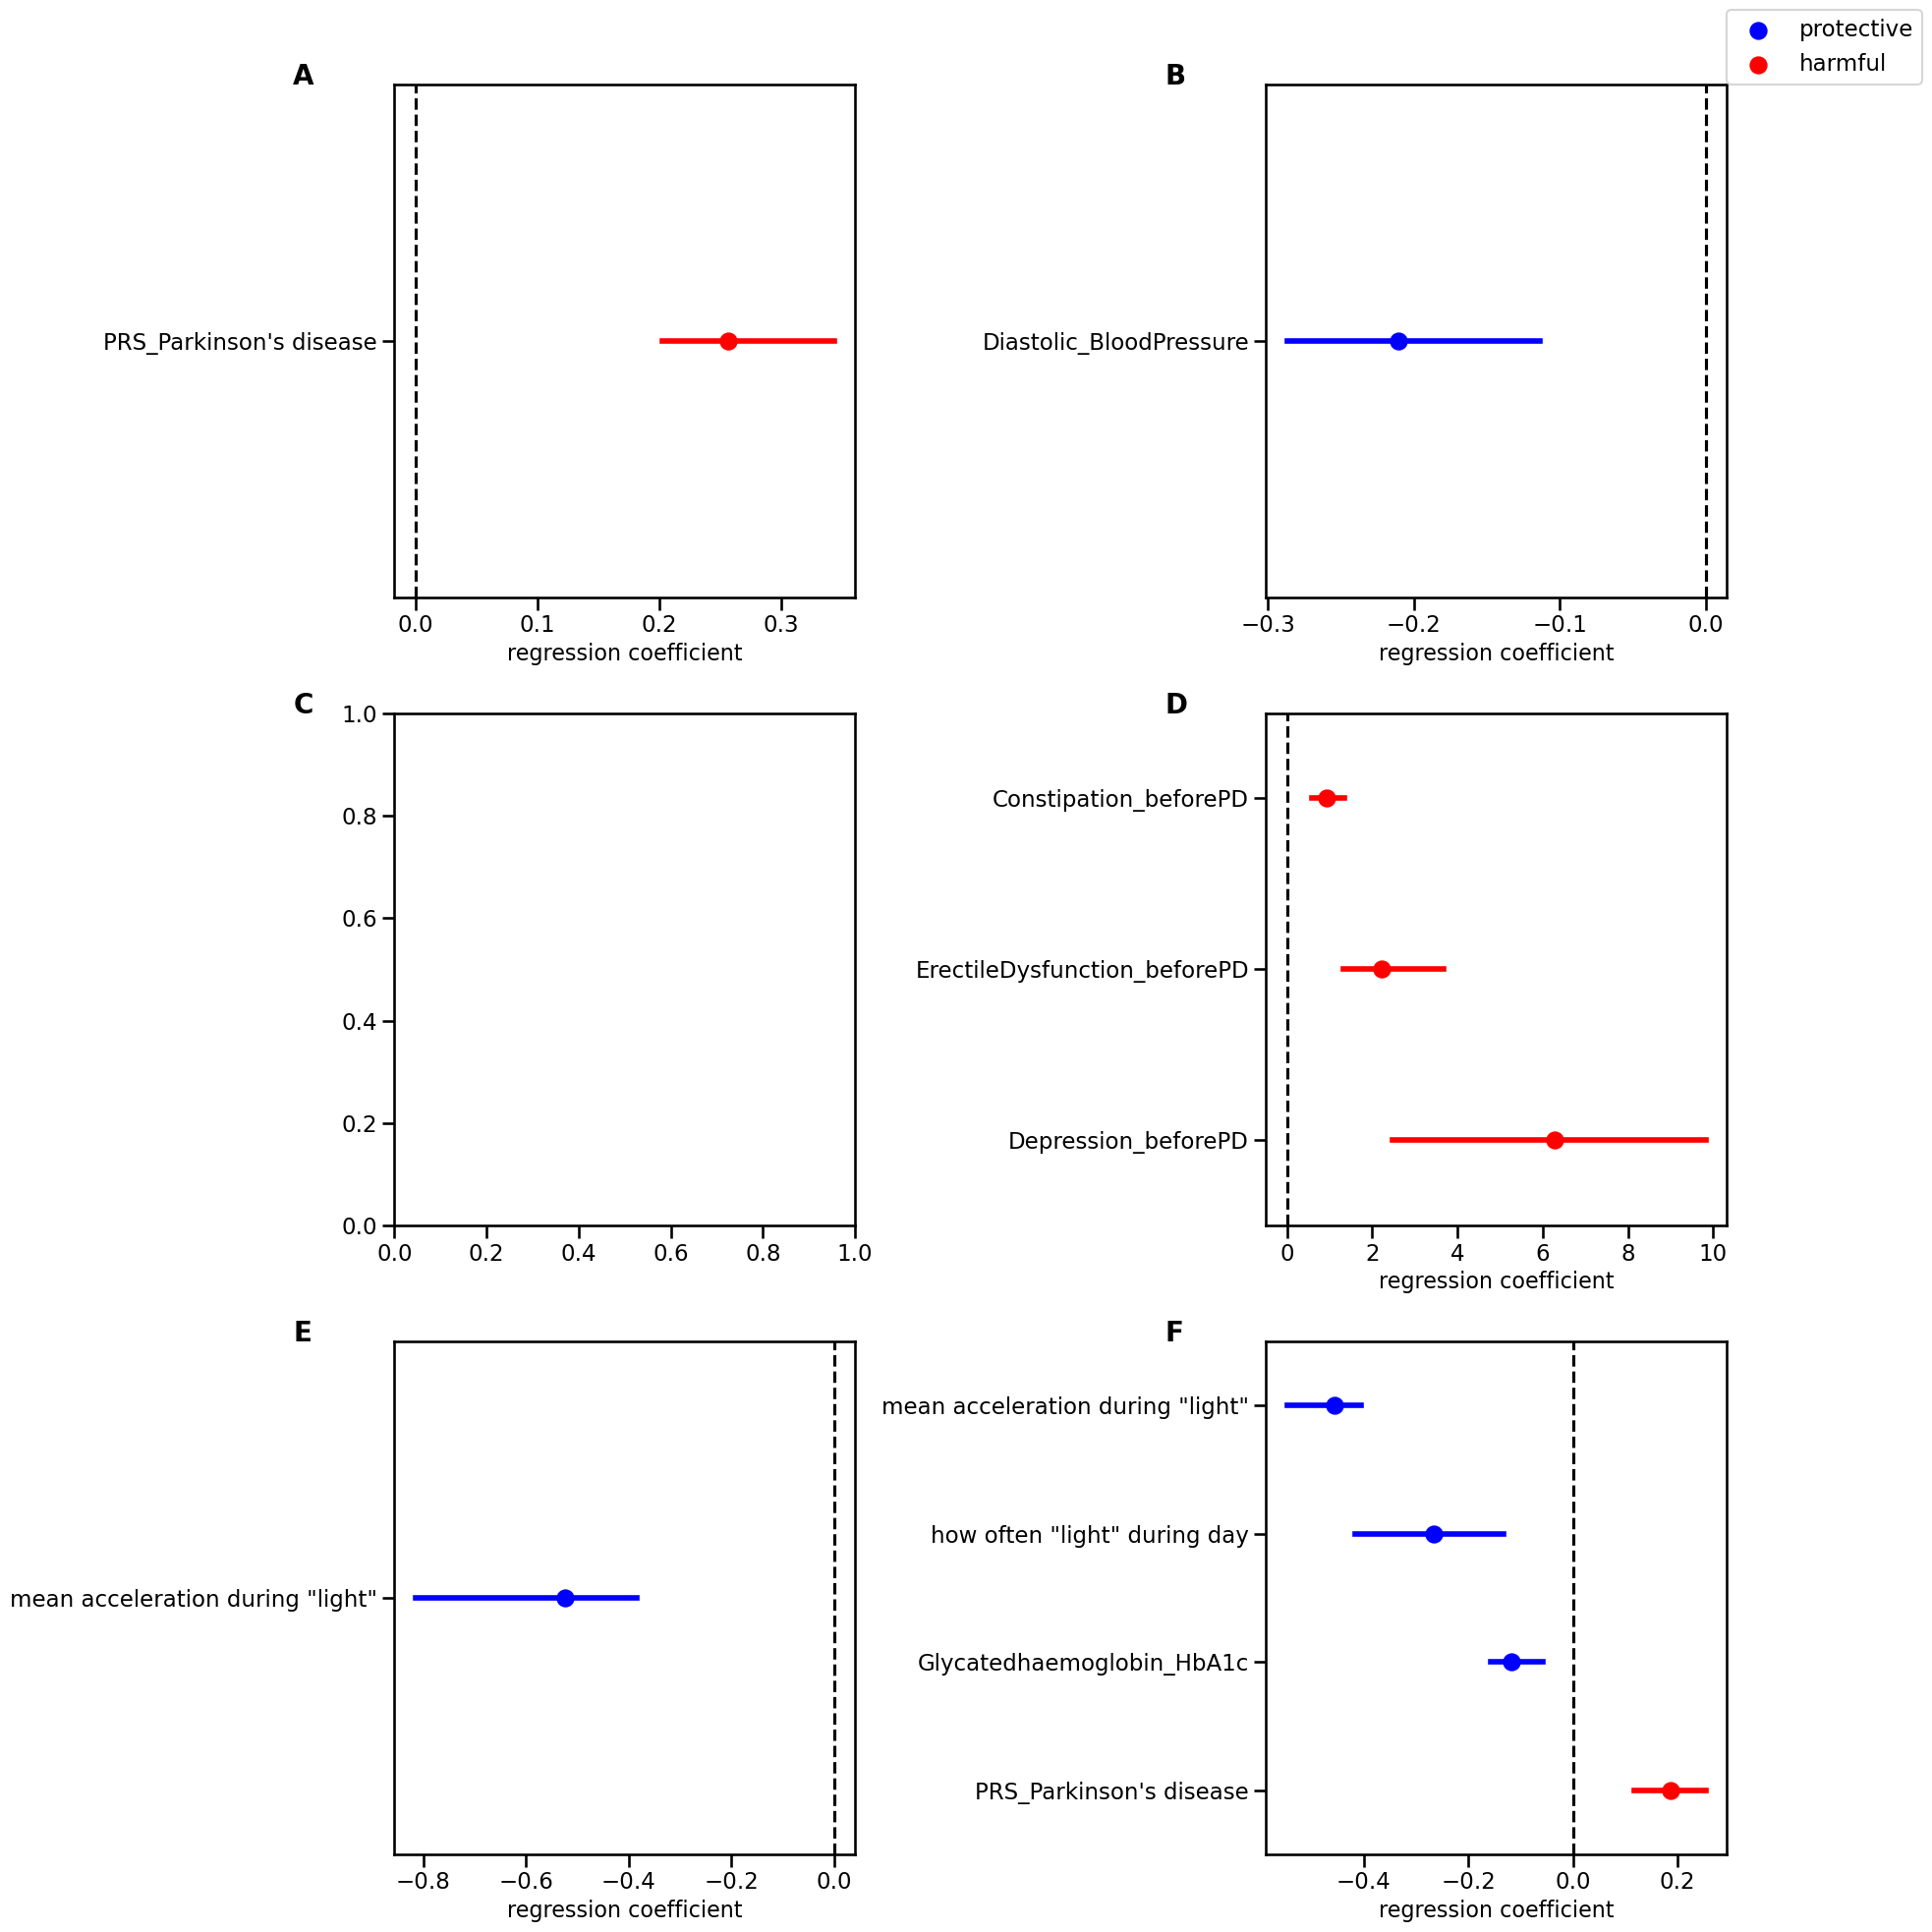

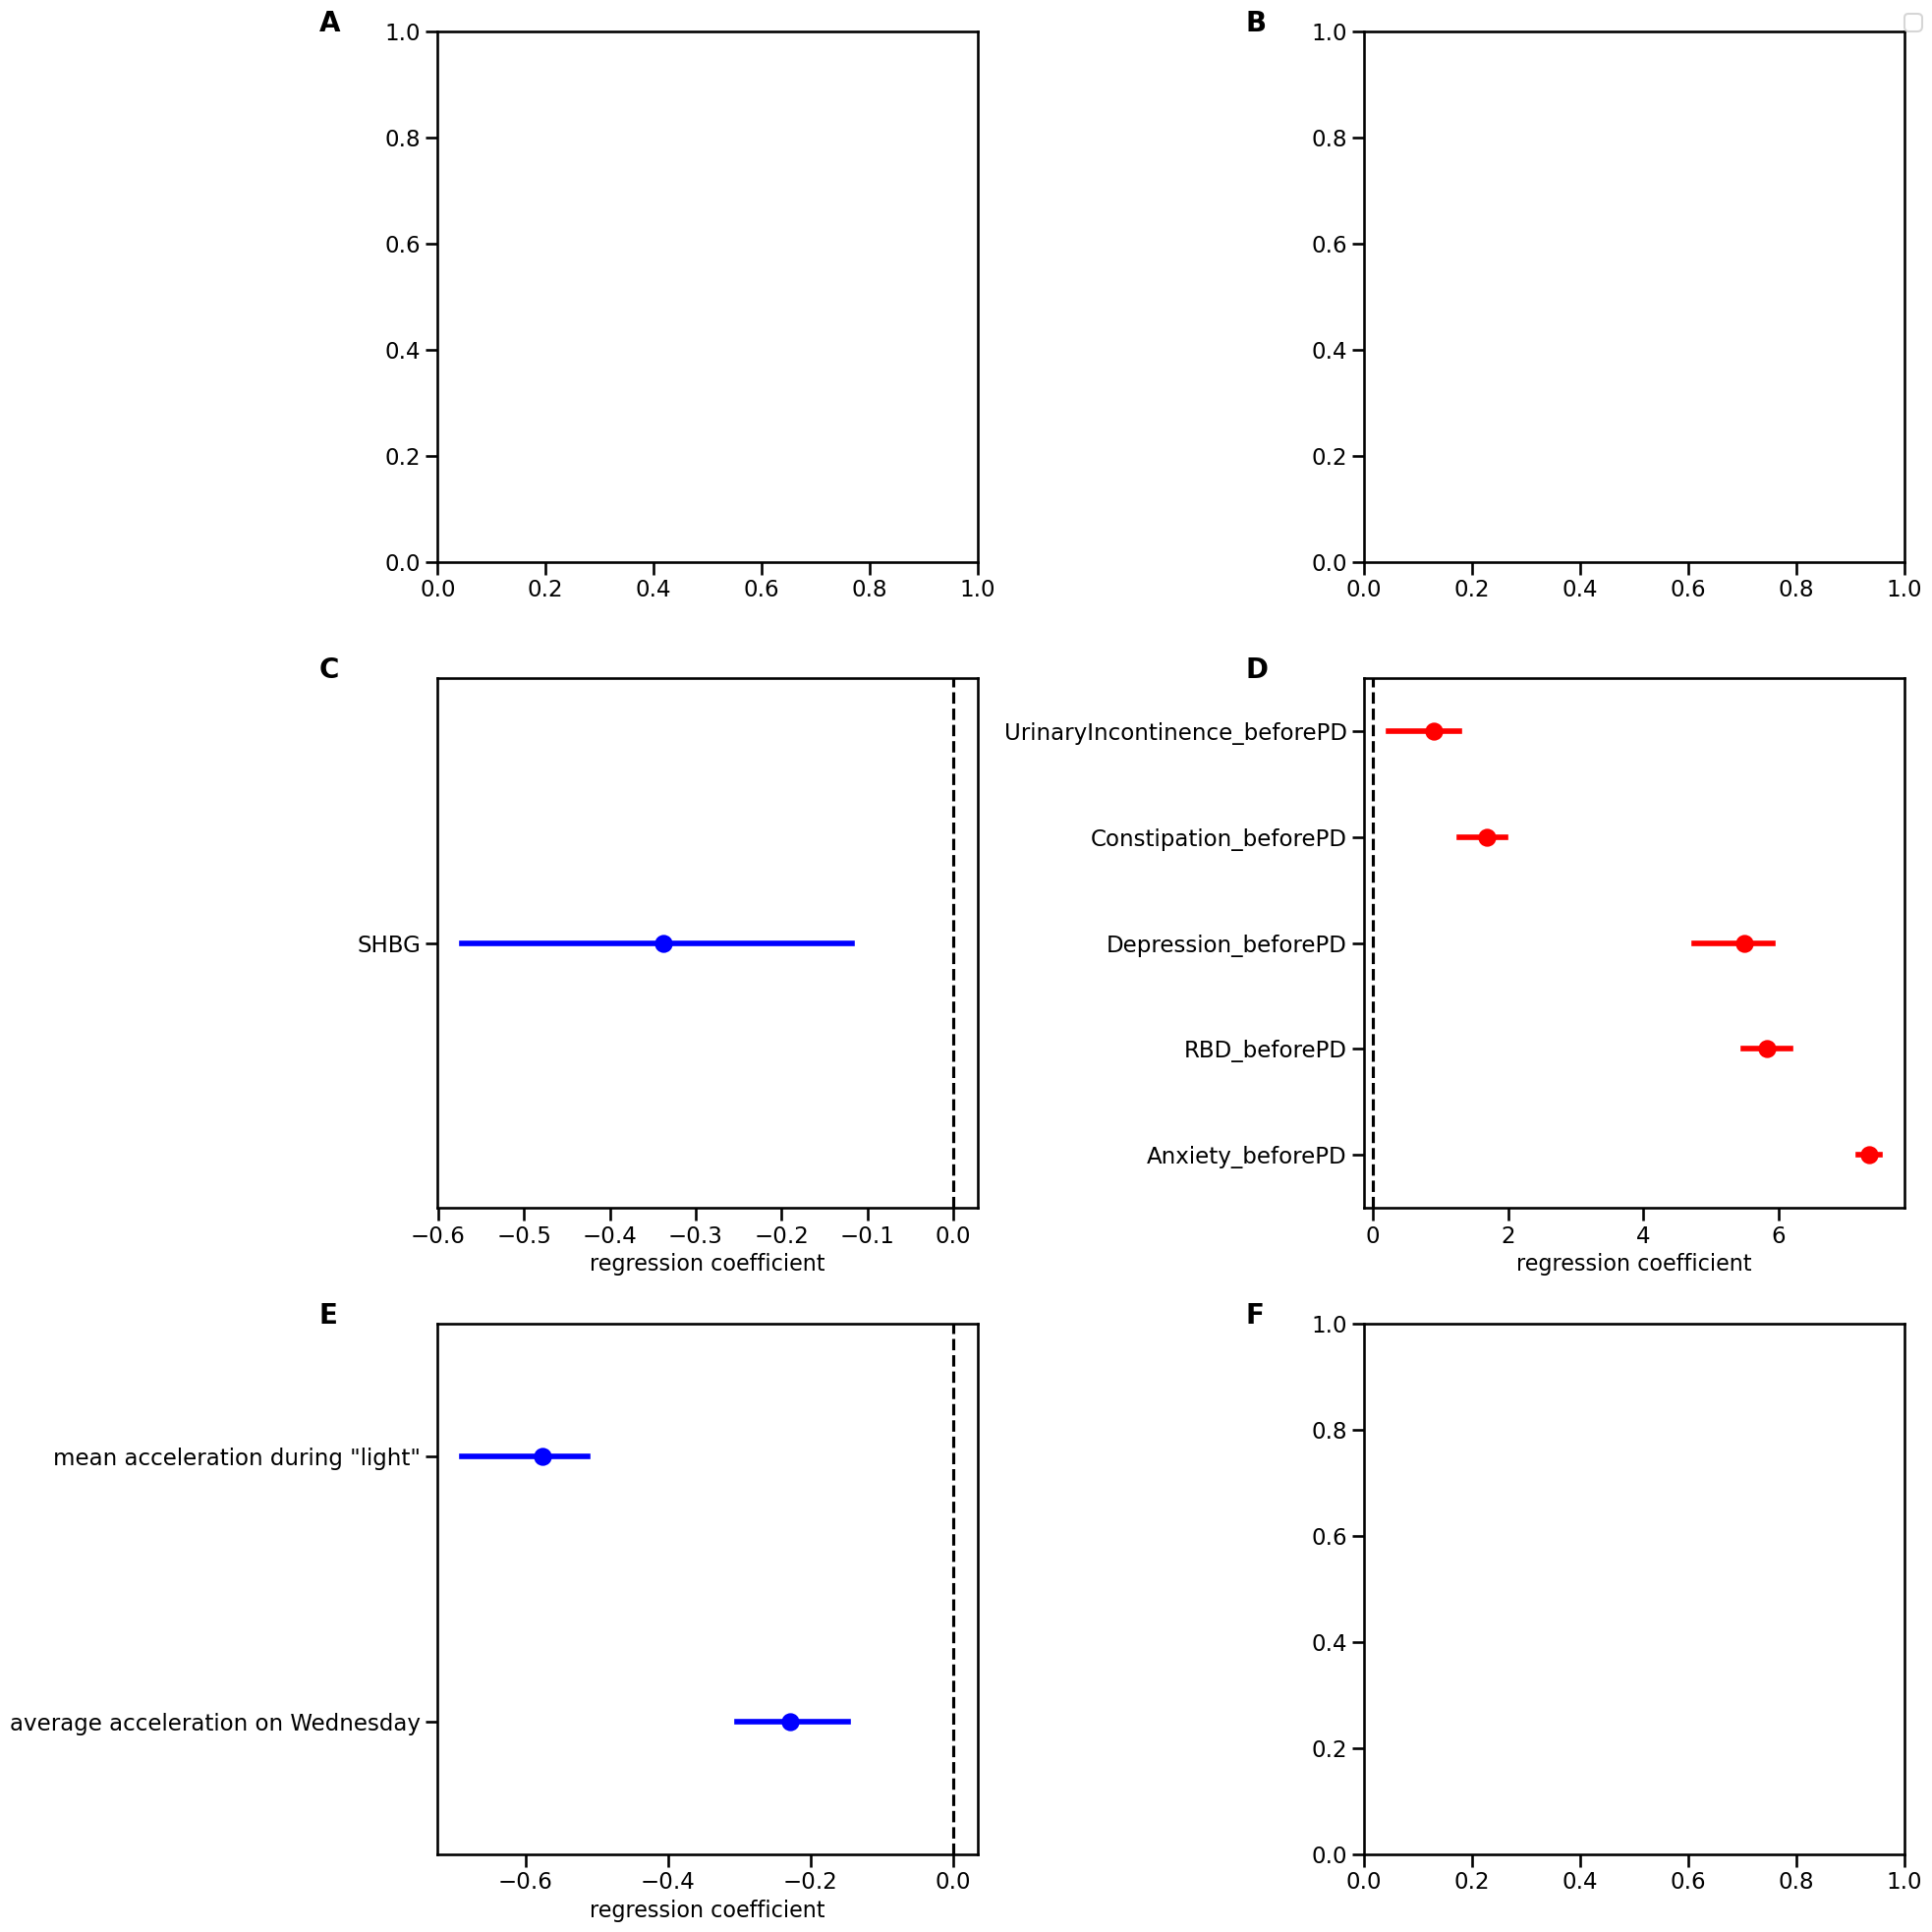

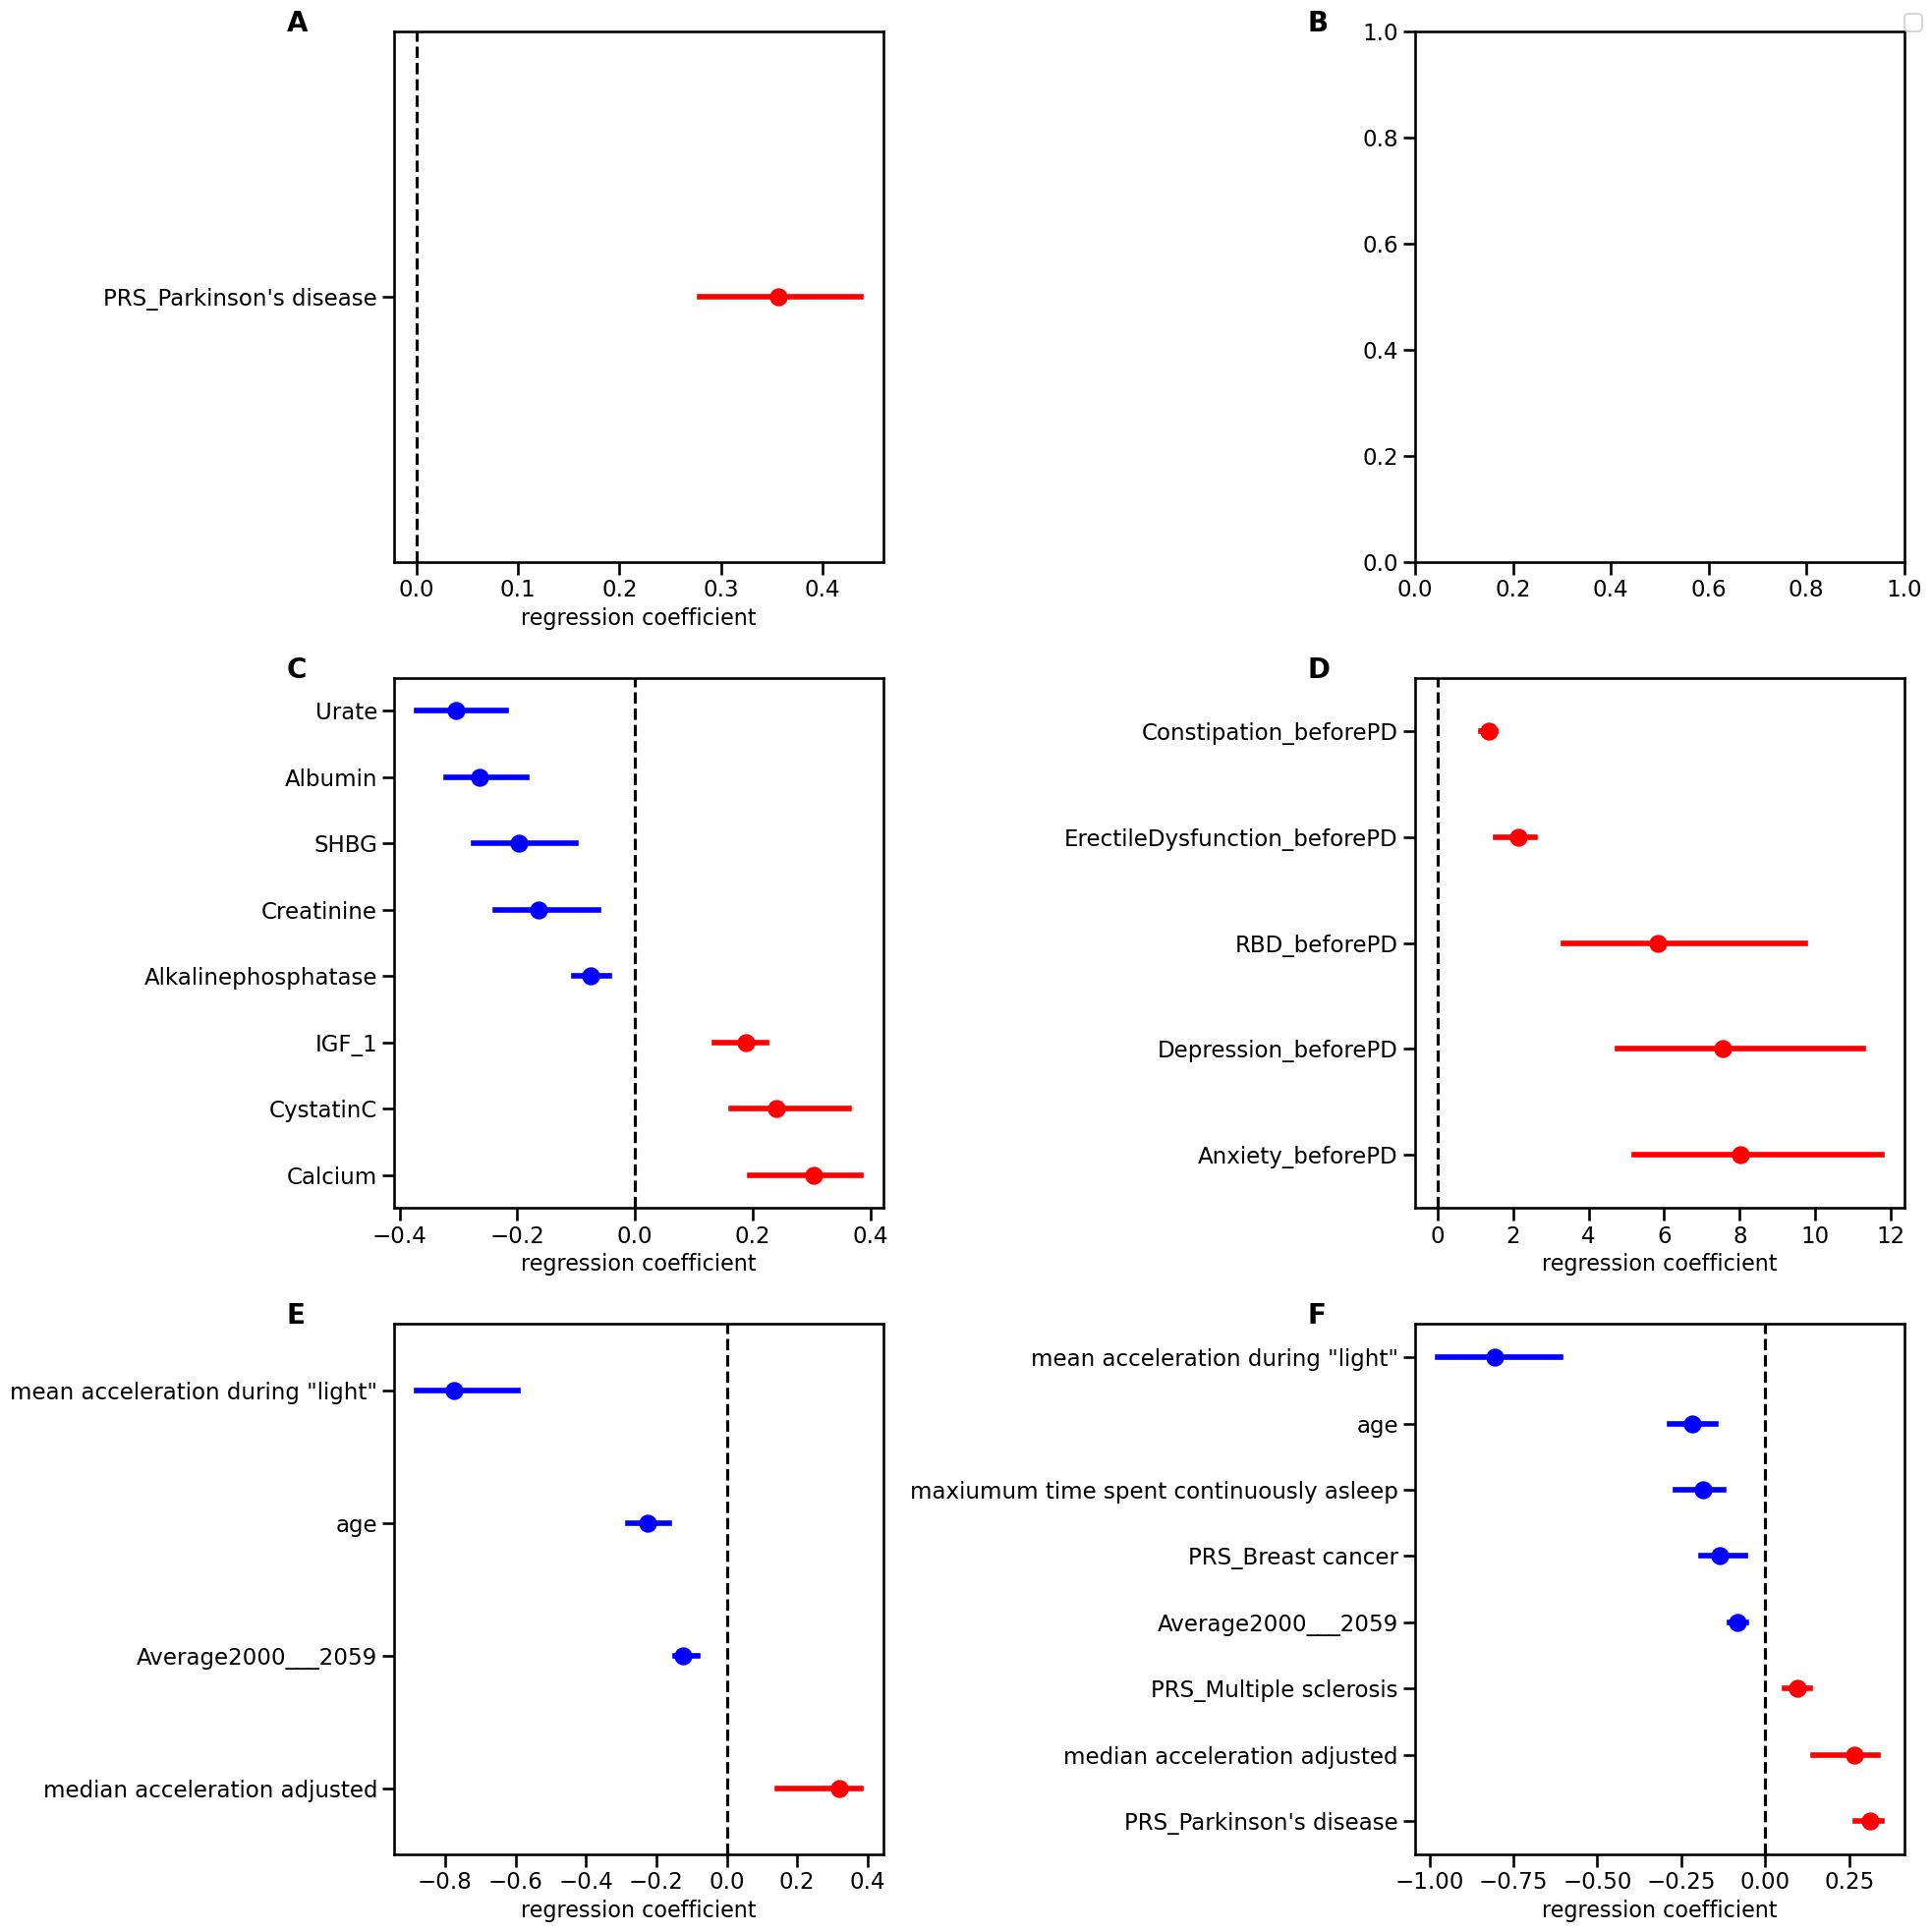

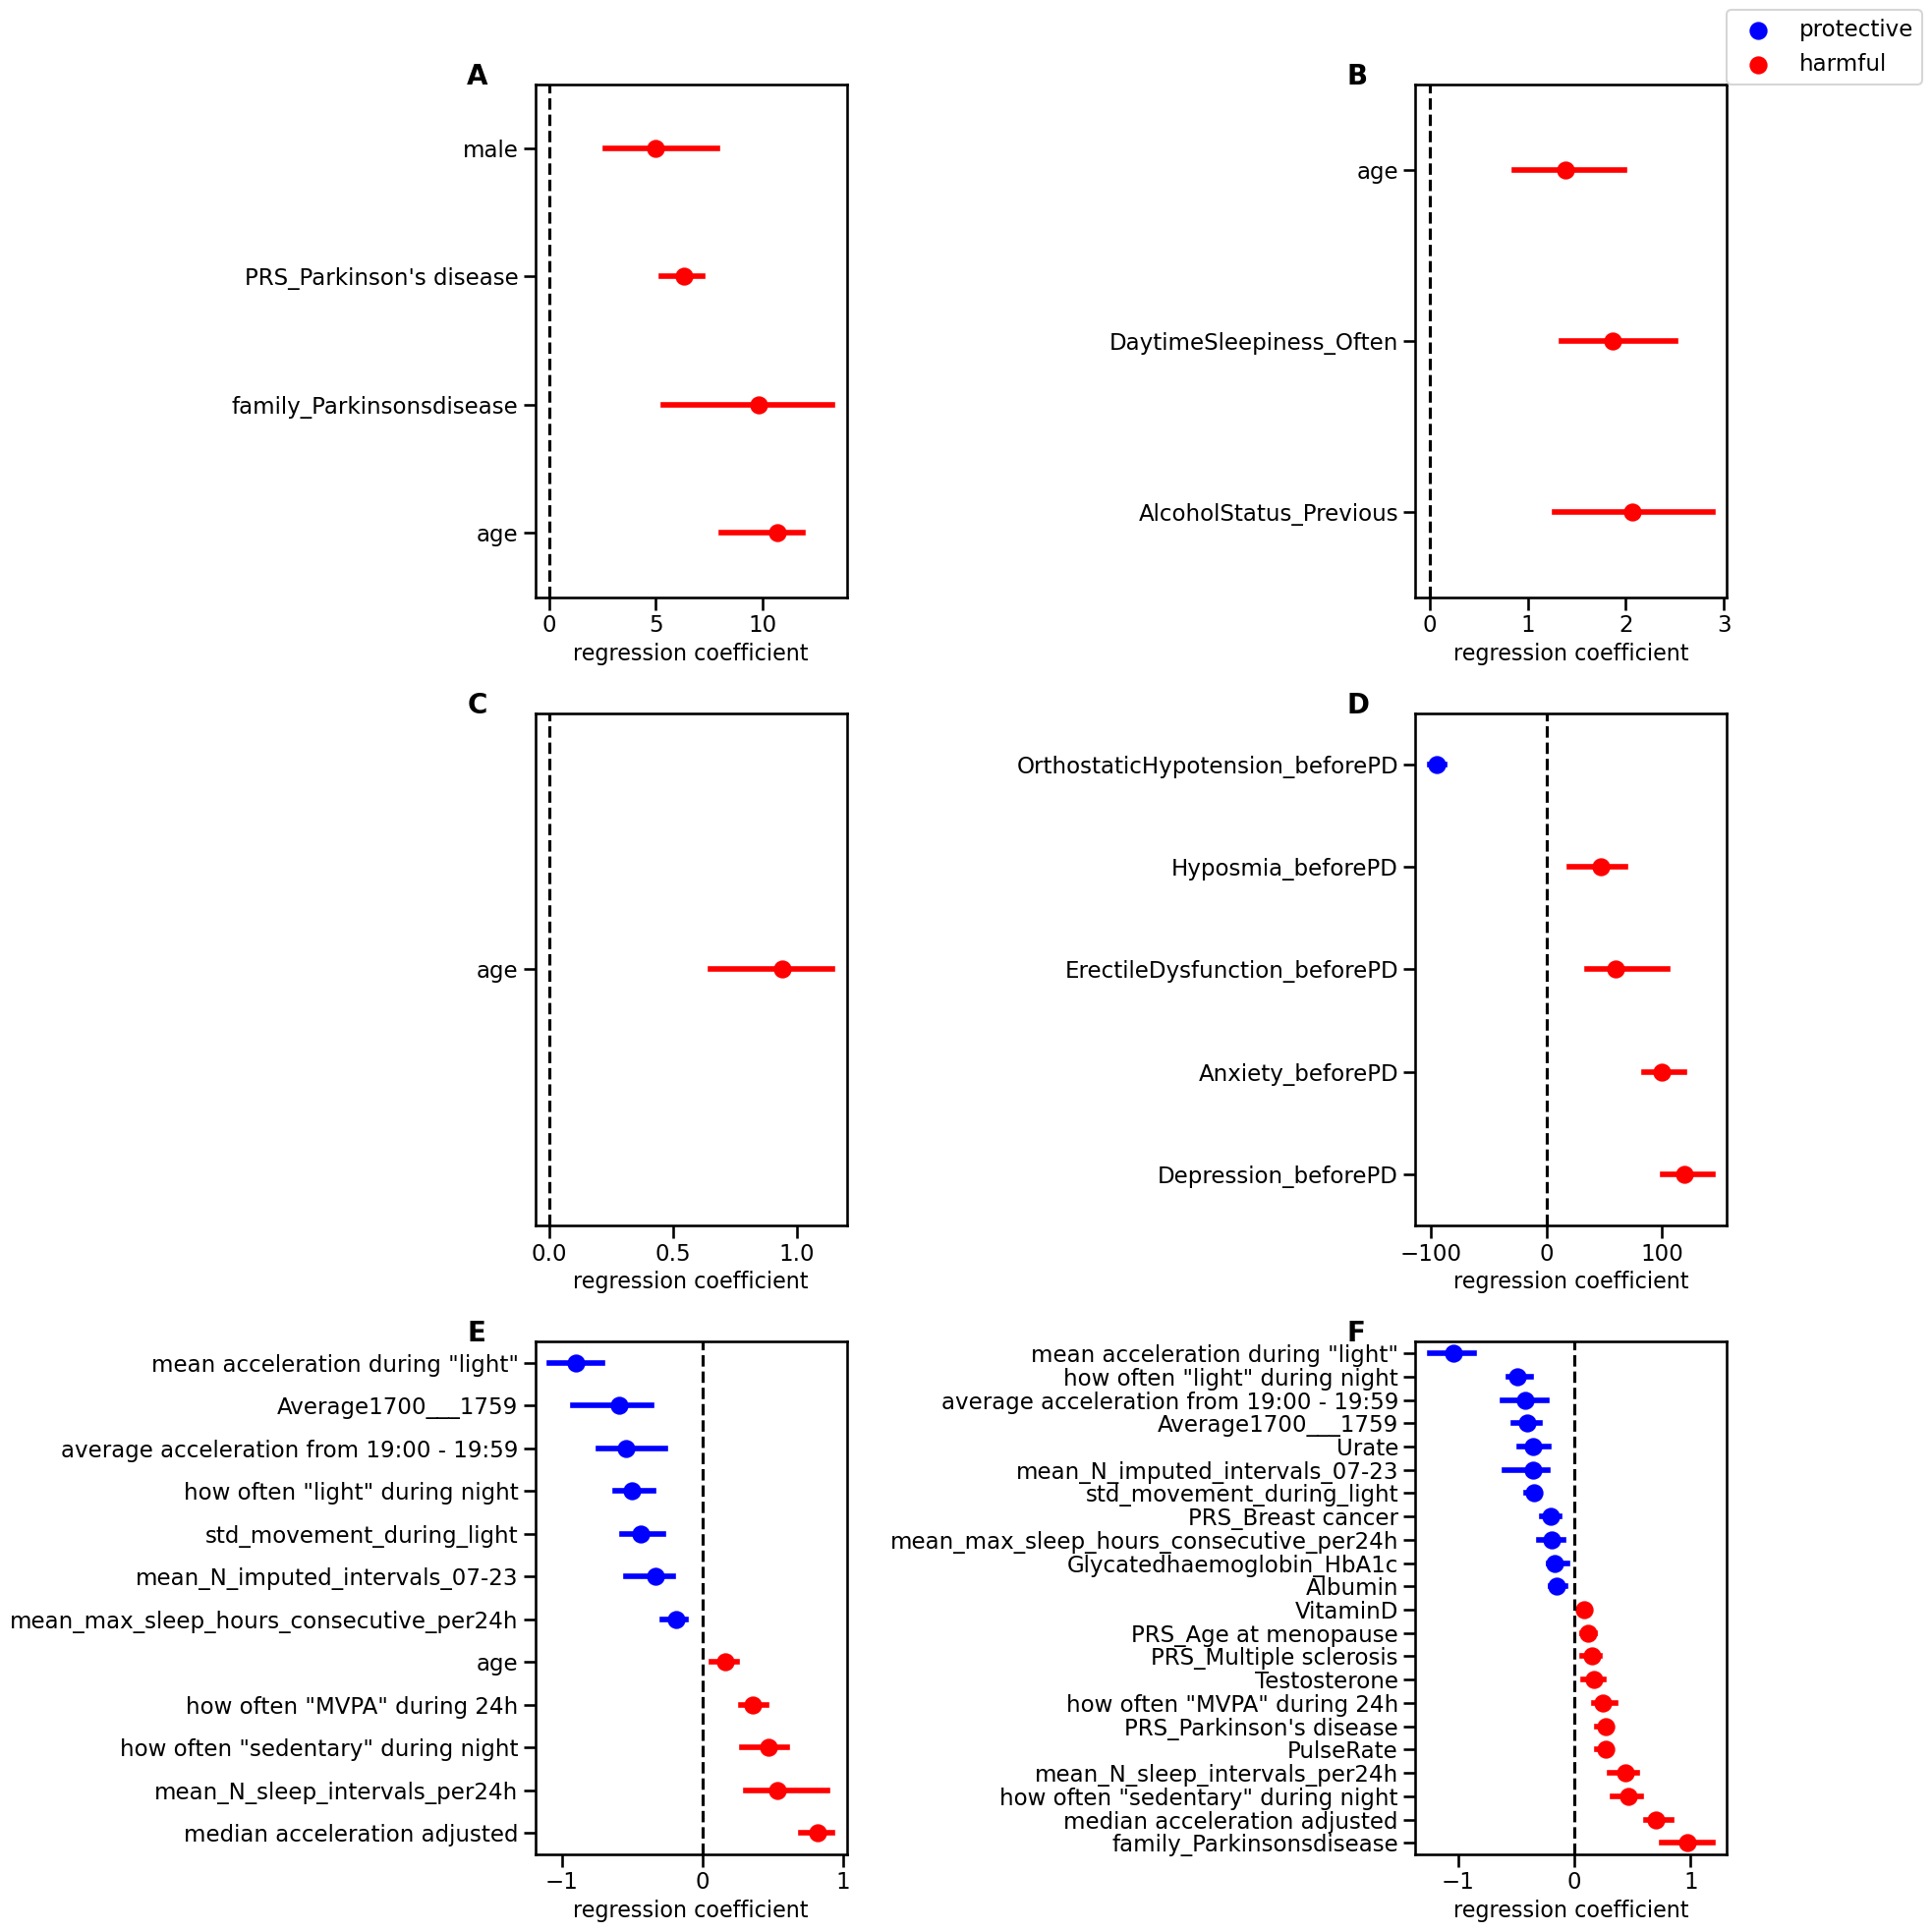

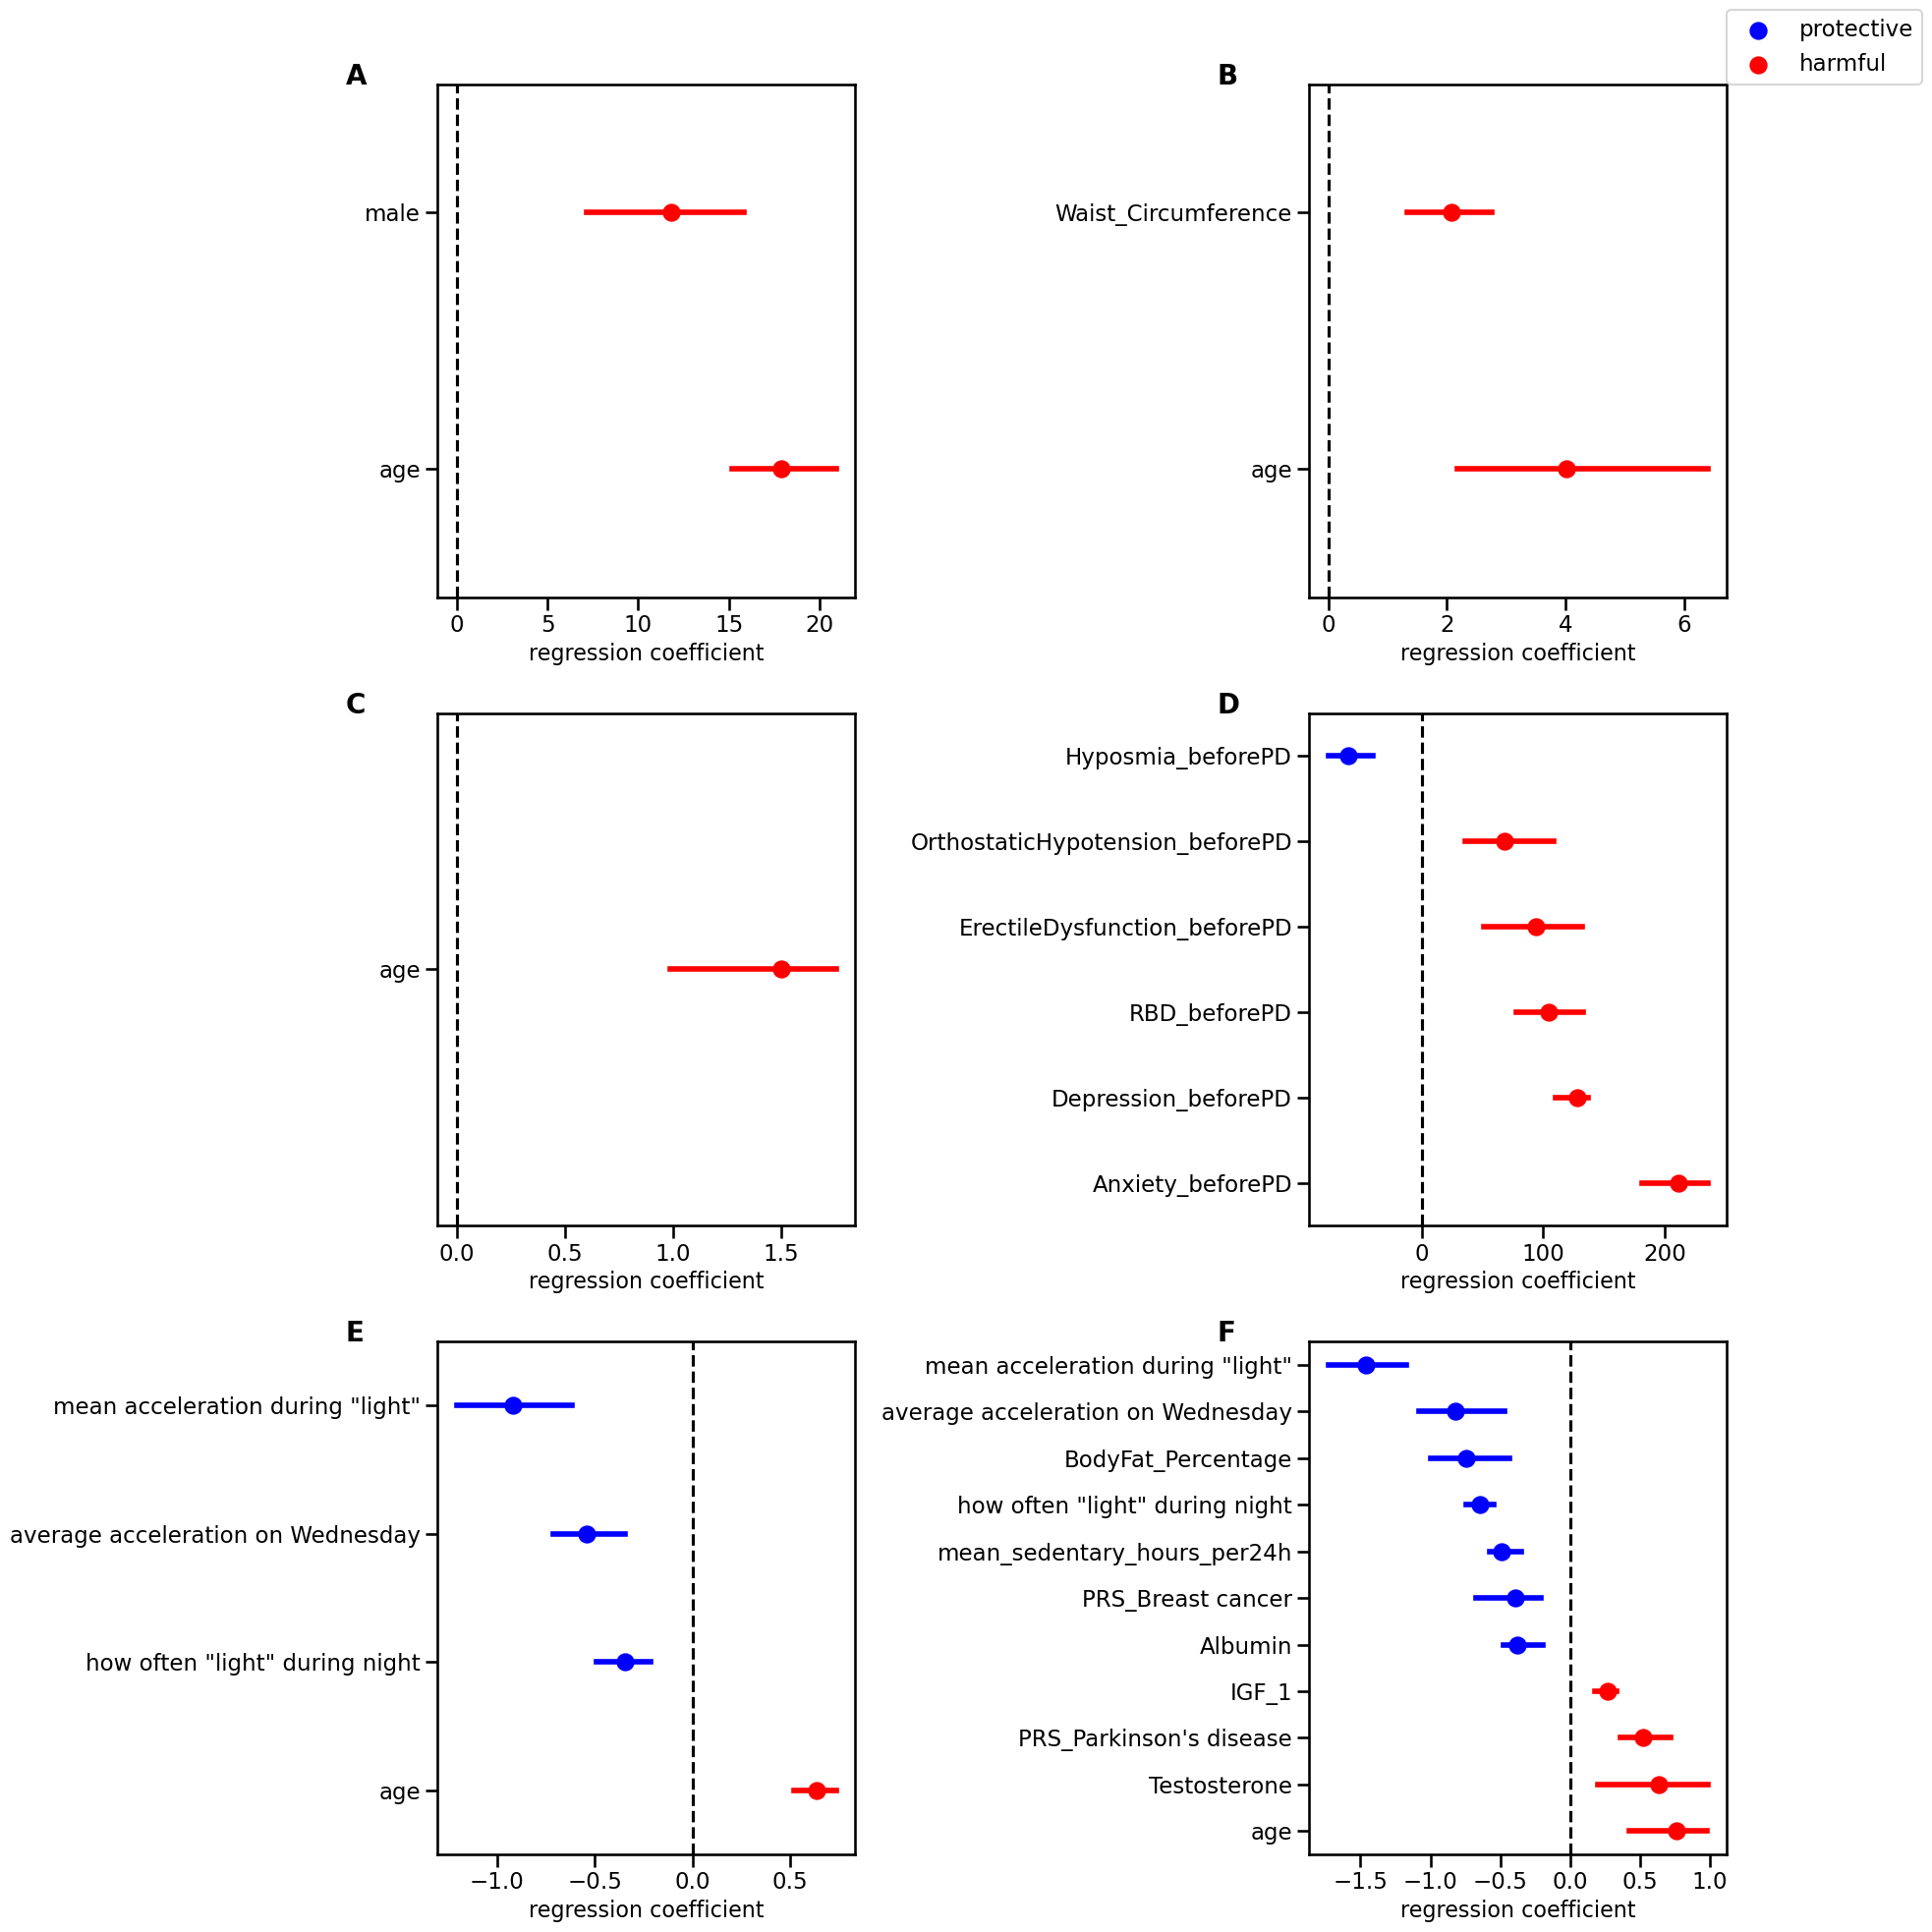

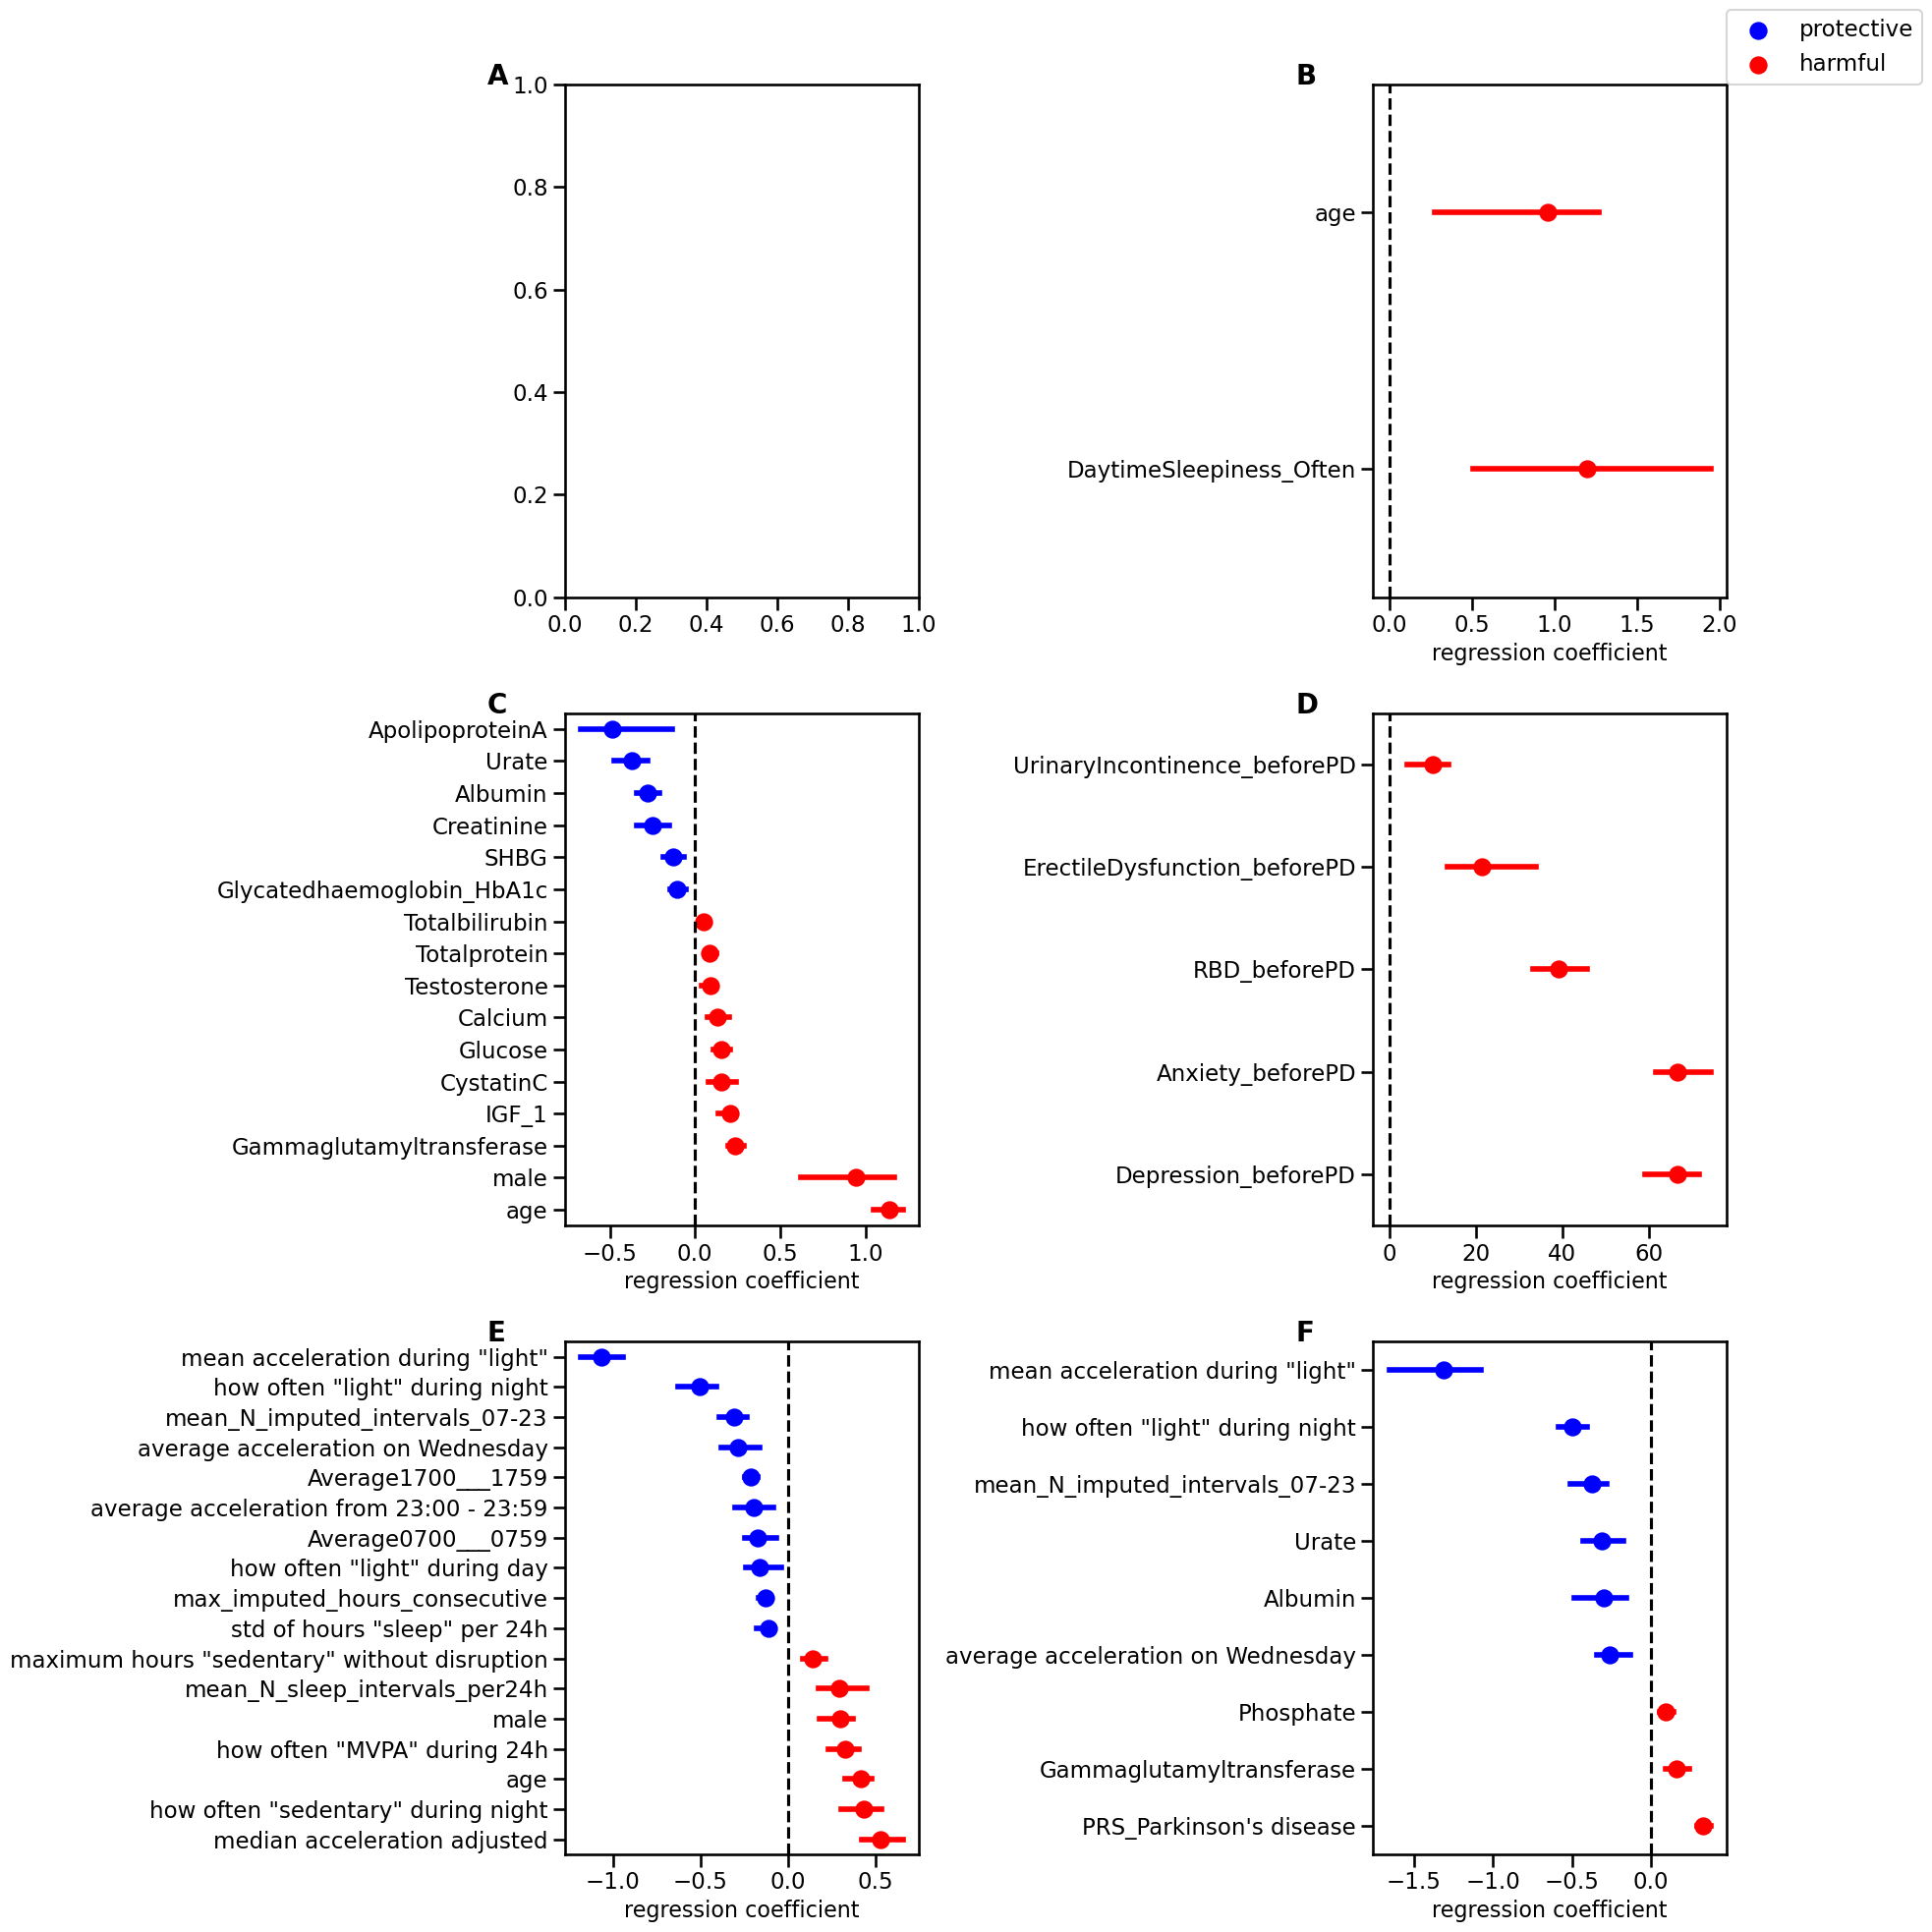

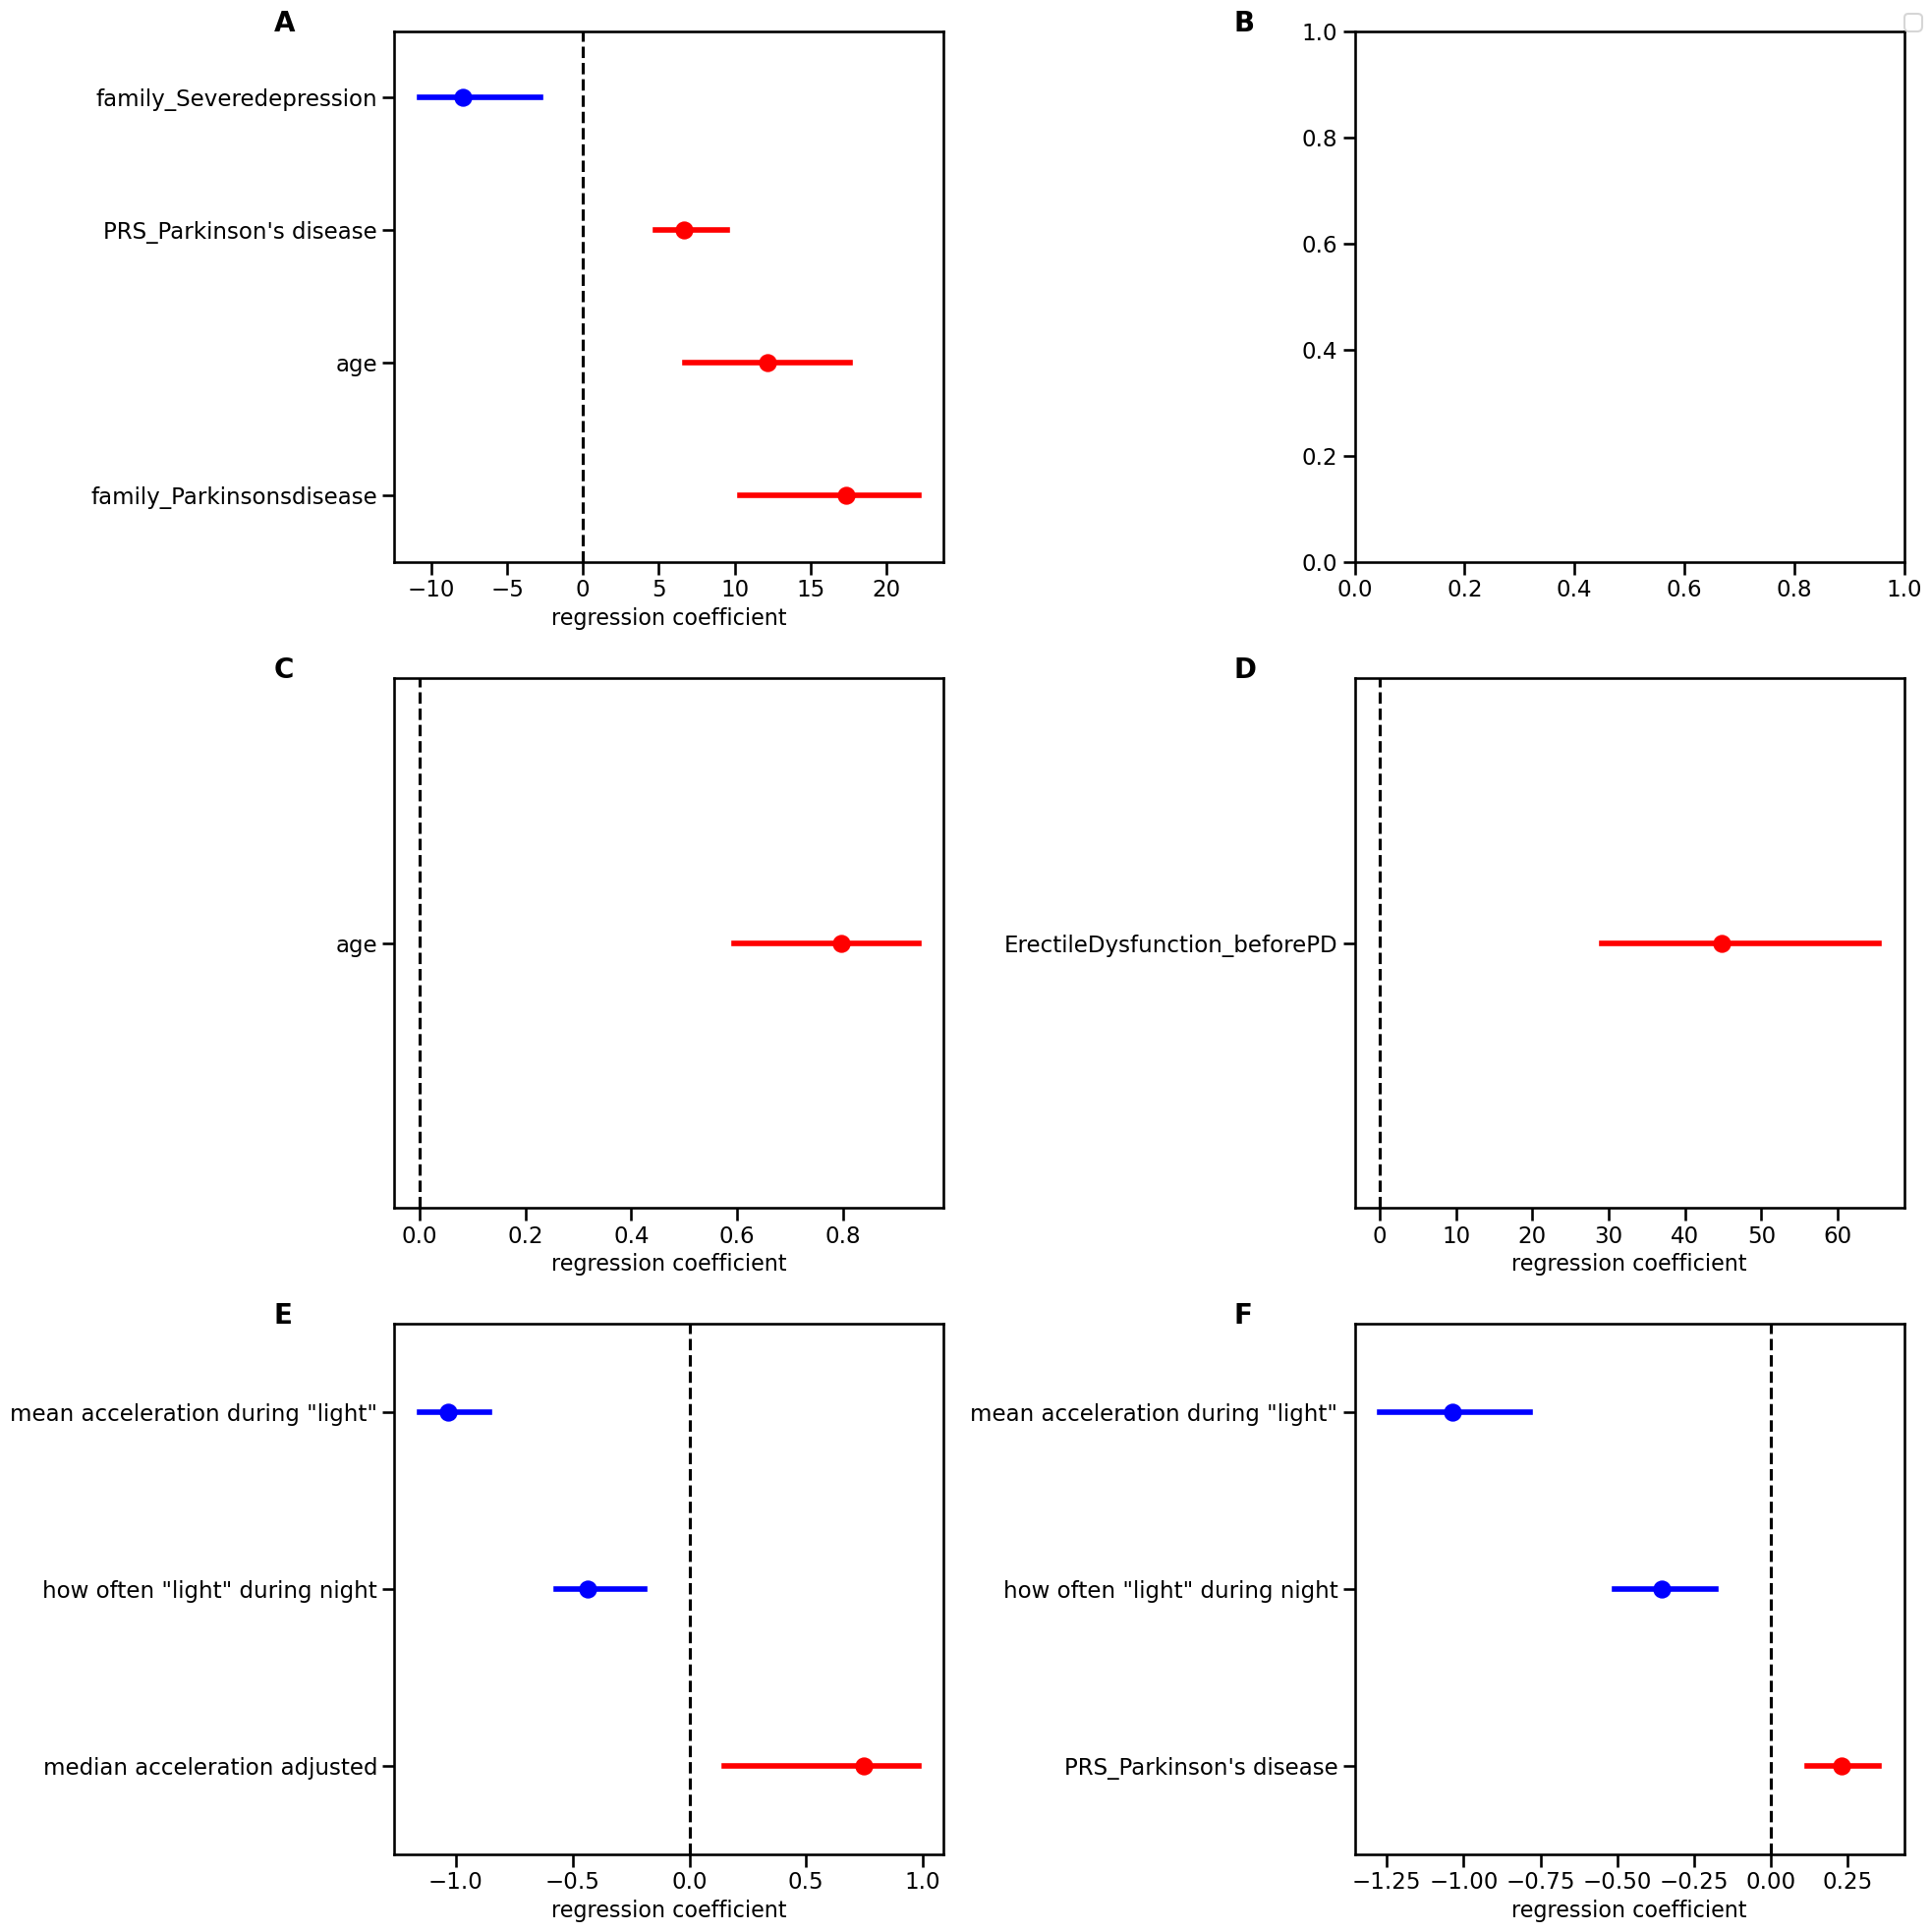

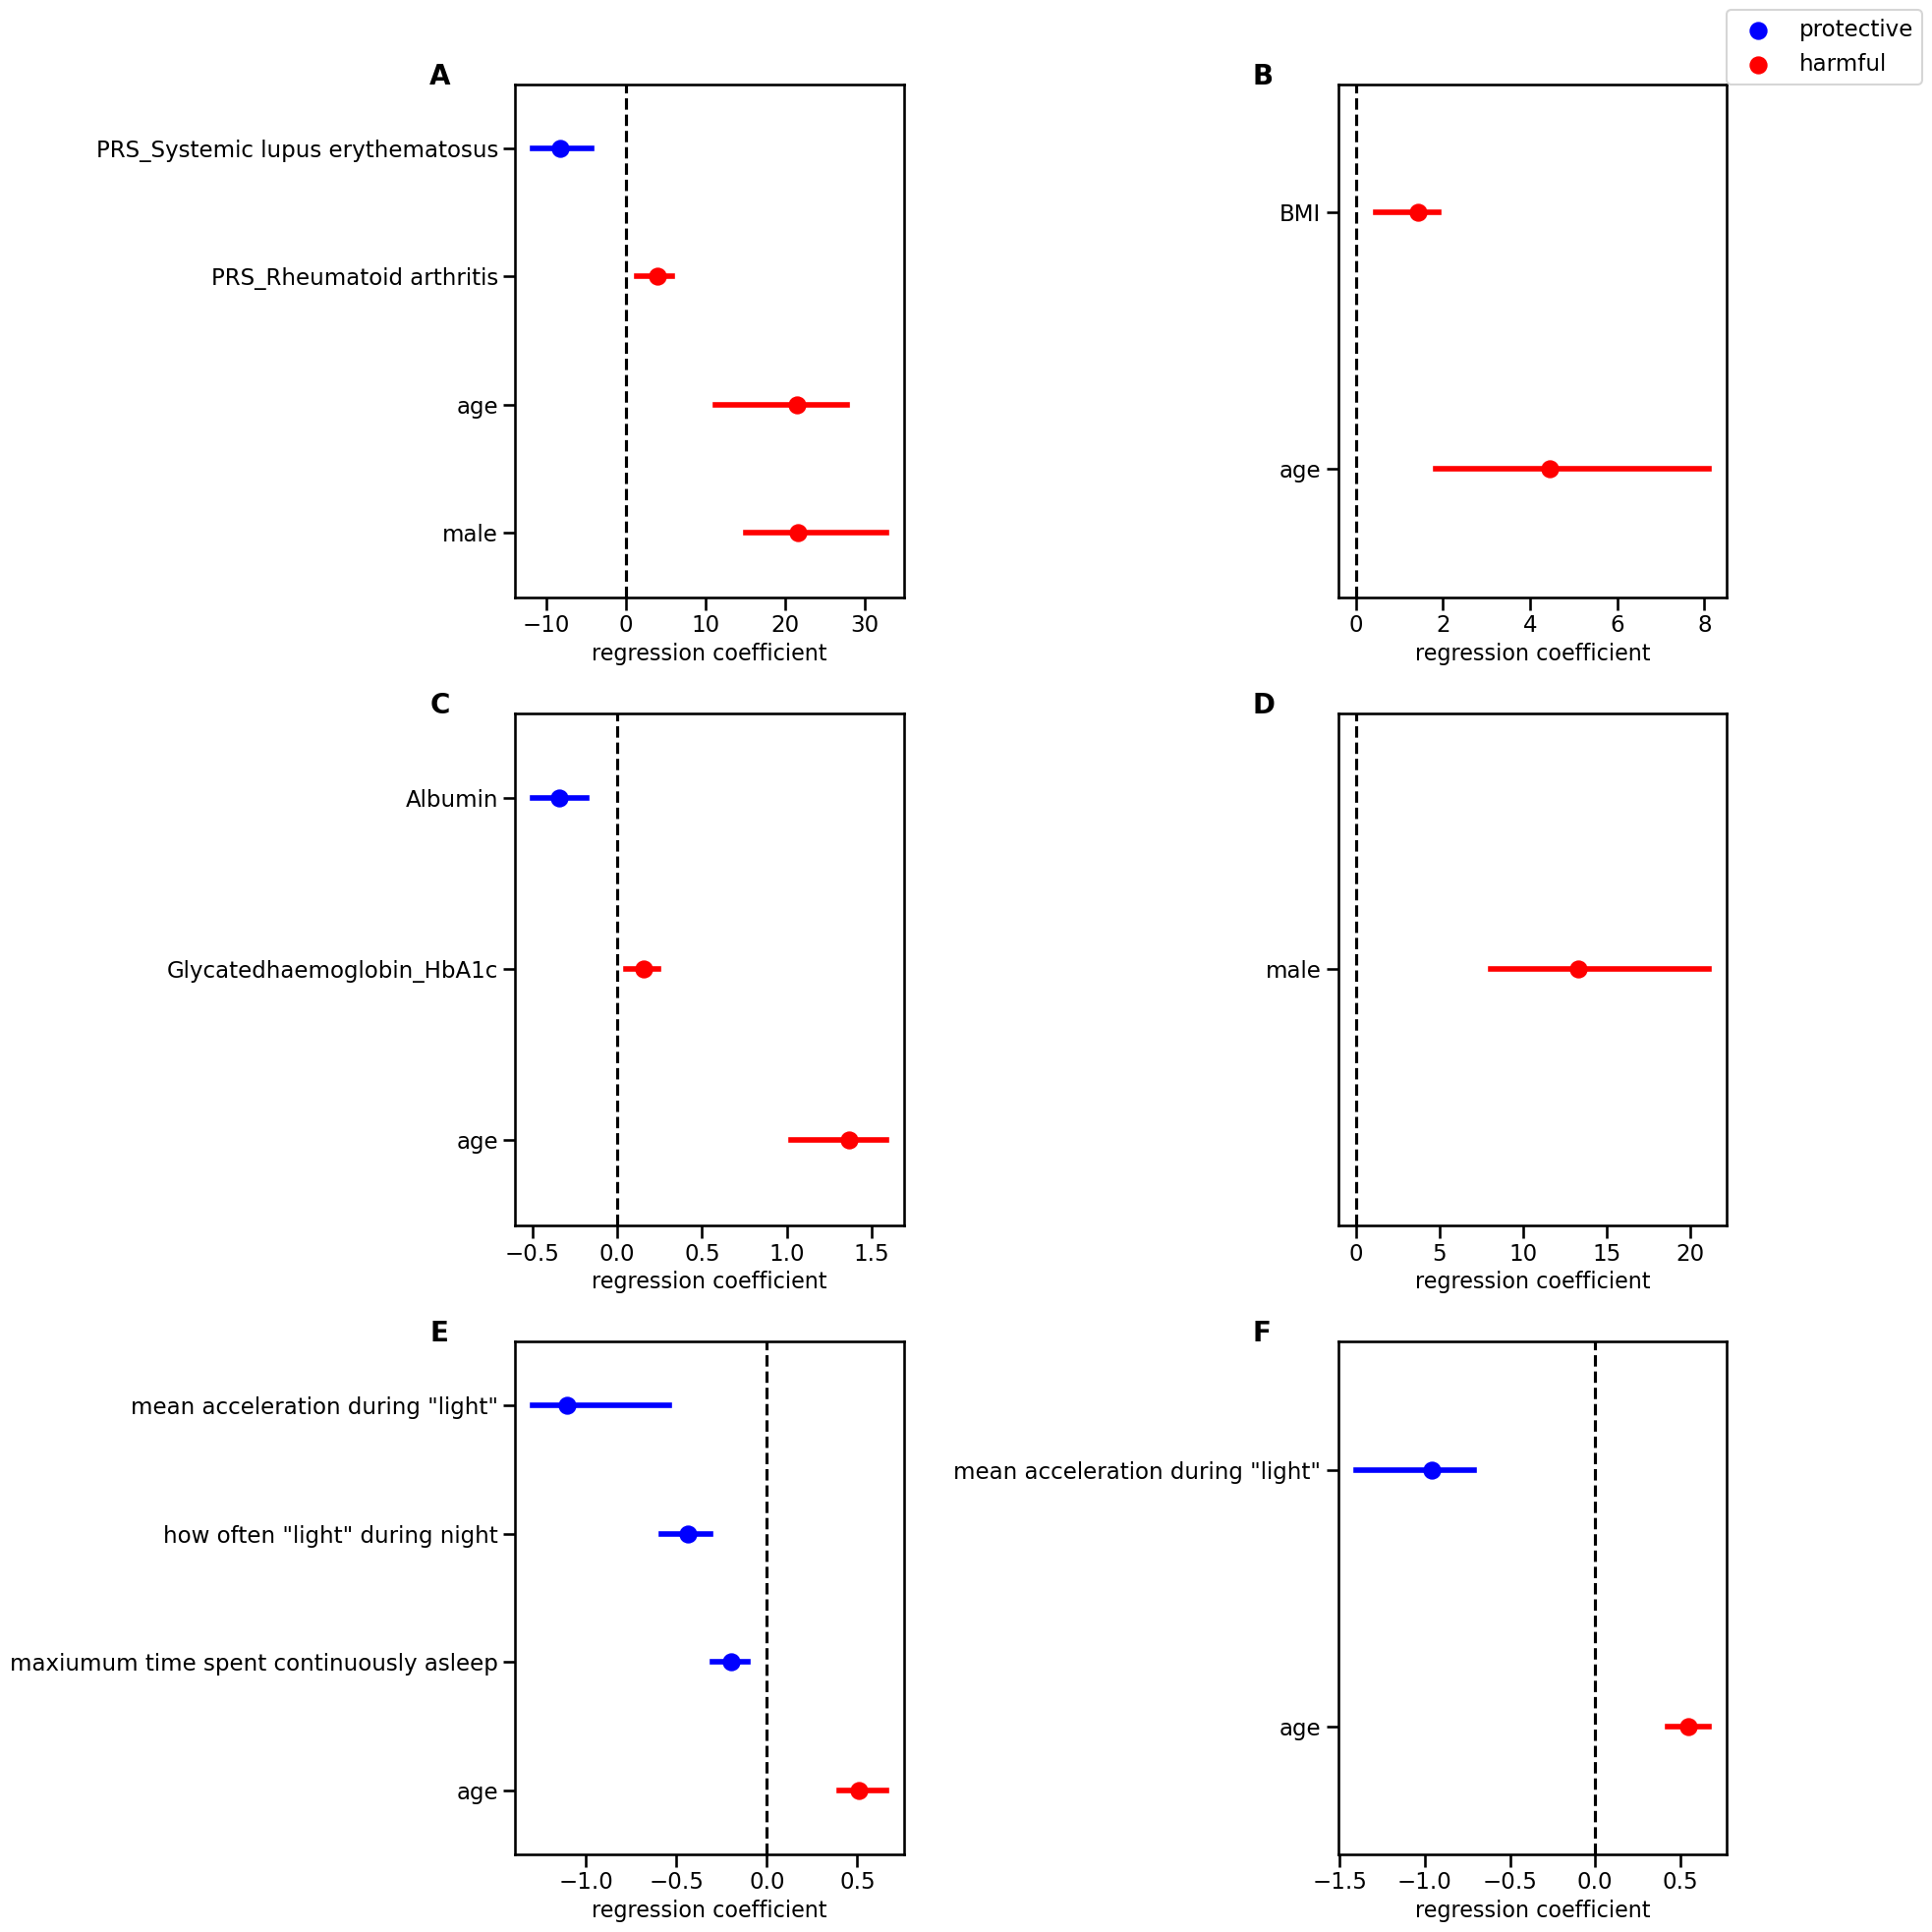

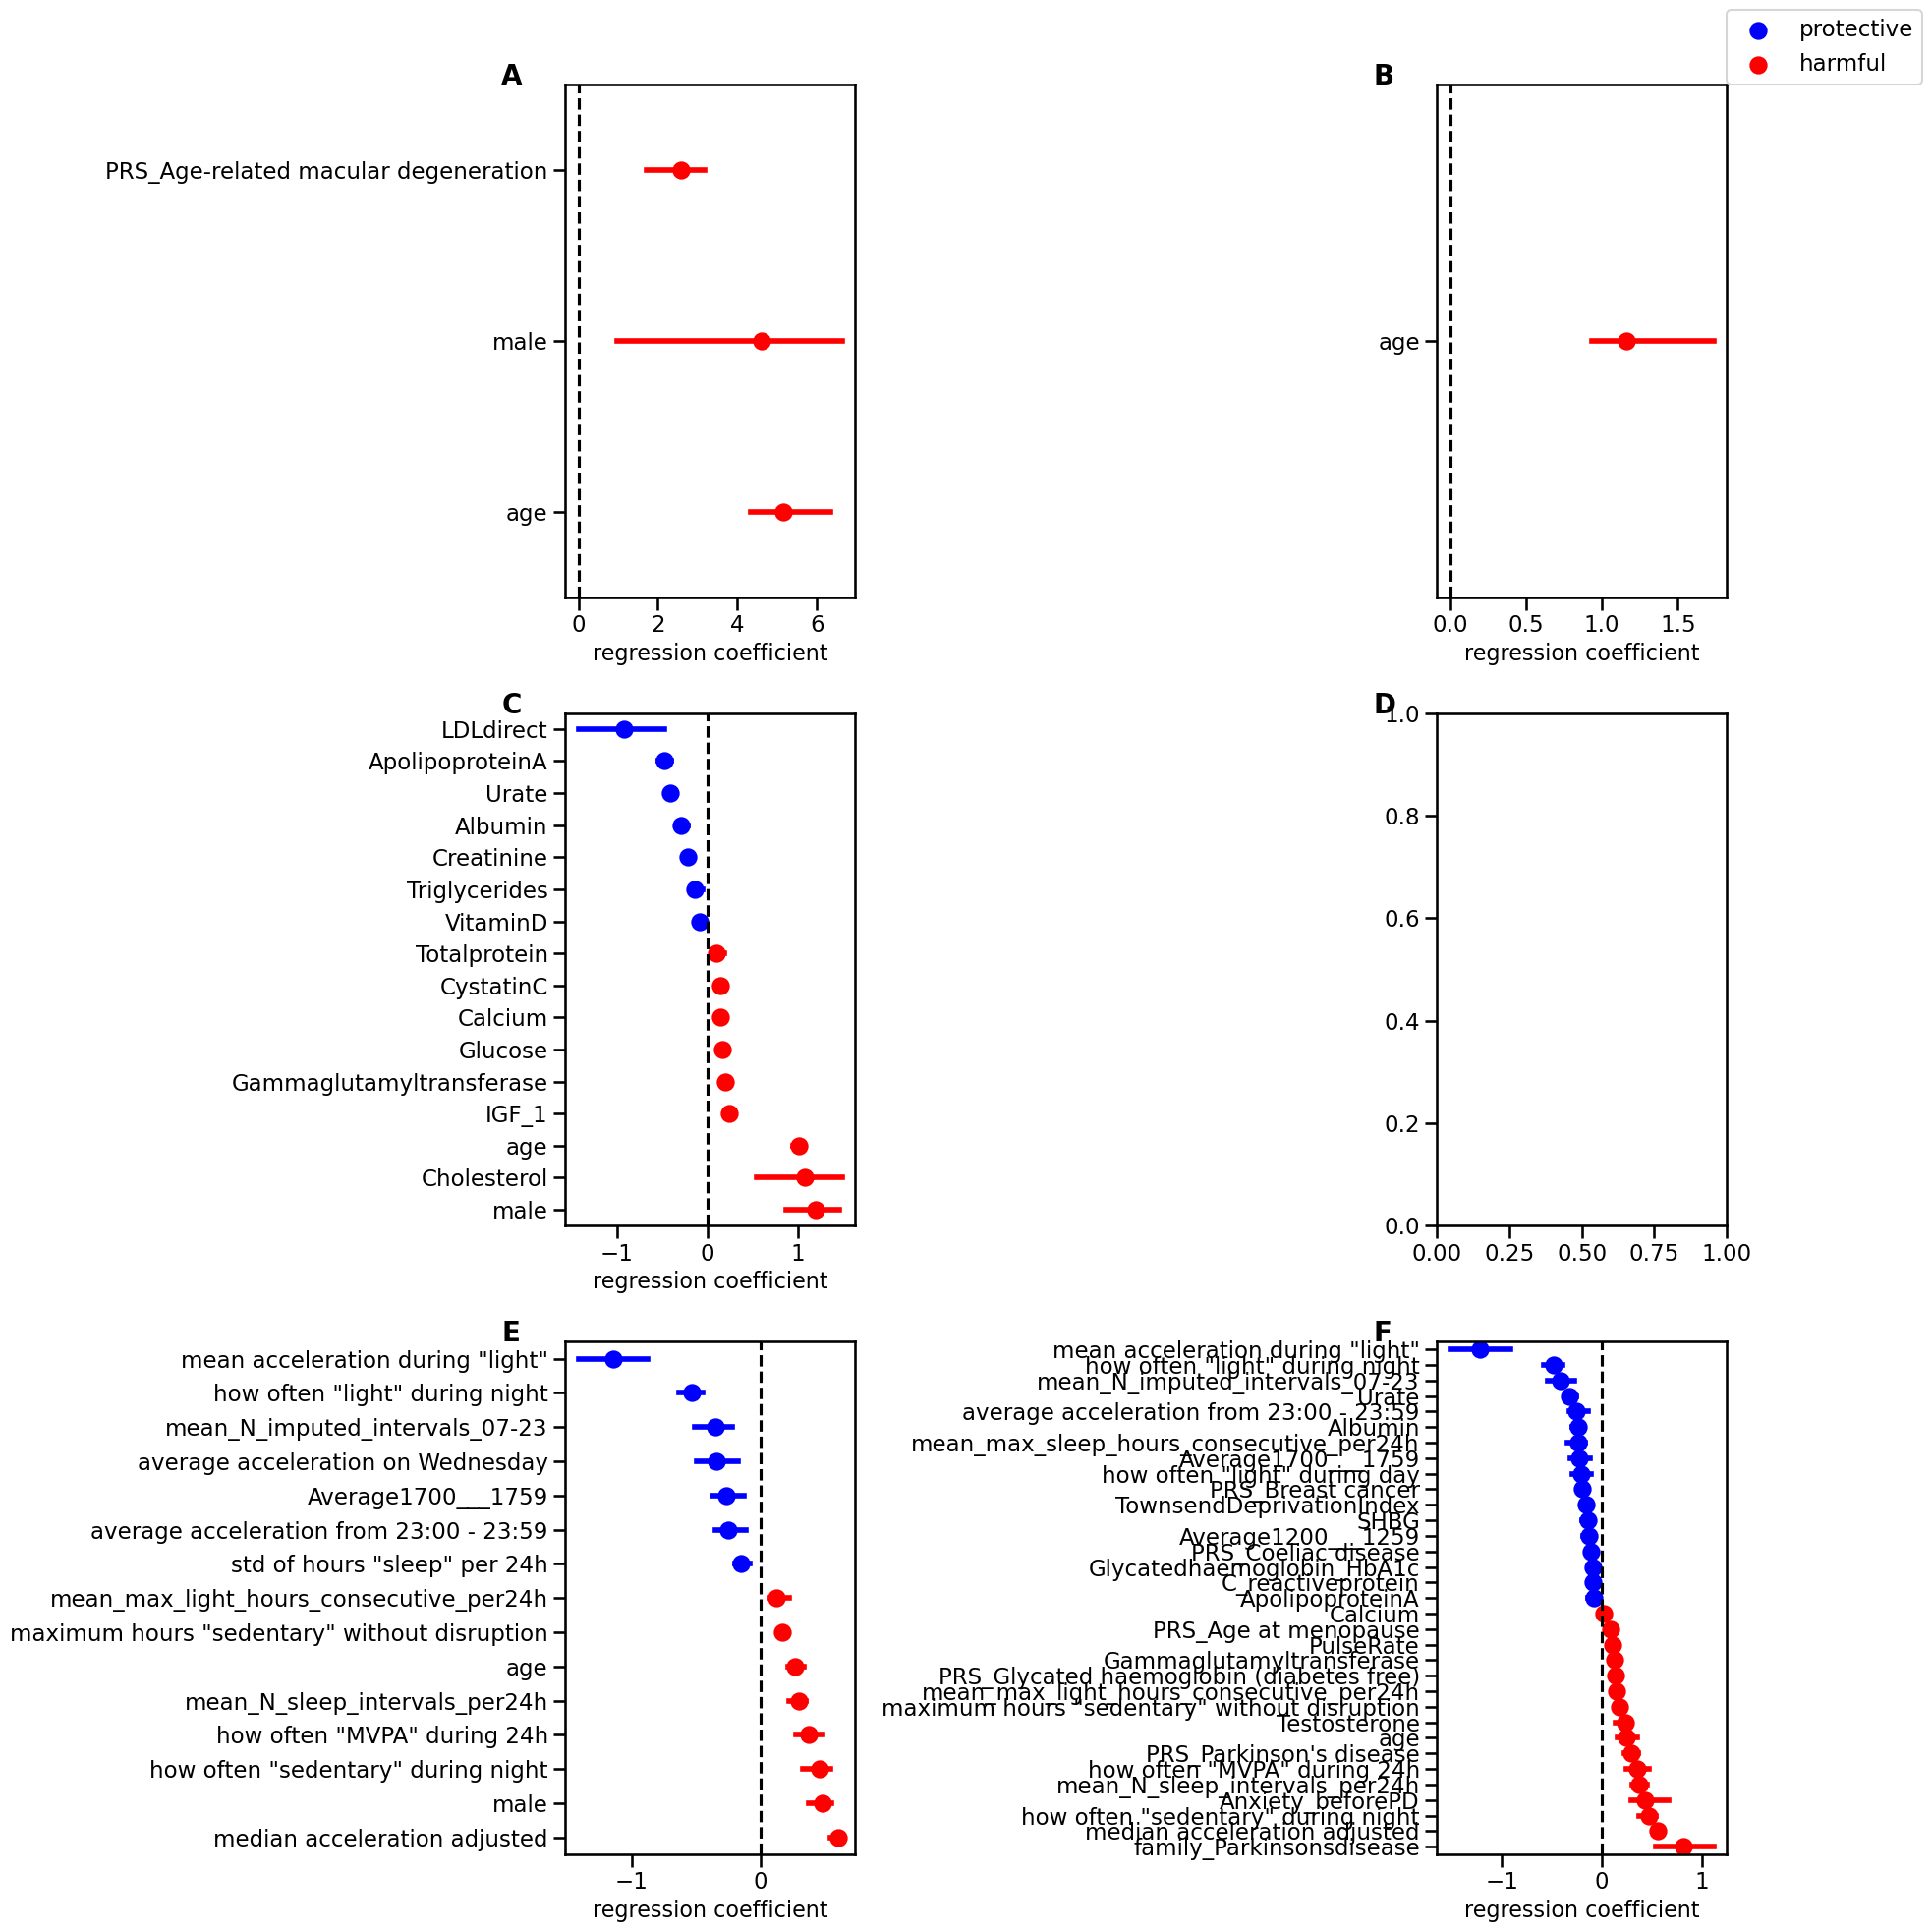

In [9]:
# feature importance consensus
diags = ['diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDPopulationNoProd','diag_ProdPopulationNoPD','diag_PDProdPopulation']
diagnames = ['diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDallHC','diag_ProdallHC','diag_PDProdallHC','diag_PDPopulationNoProd','diag_ProdPopulationNoPD','diag_PDProdPopulation']
kinds = ['HC','HC','HC','allHC','allHC','allHC','pop','pop','pop']
features = ['genetics+family','lifestyle_nofam','blood','prodromalsigns_beforePD',
            'all_acc_features','all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD']
PRSs = pd.Index(['Age at menopause', "Alzheimer's disease",
       'Atrial fibrillation', 'Age-related macular degeneration', 'Asthma',
       'Breast cancer', 'Bipolar disorder', 'Body mass index',"Crohn's disease", 'Coeliac disease', 'Bowel cancer',
       'Cardiovascular disease UK', 'Estimated bone mineral density T-score',
       'Epithelial ovarian cancer', 'Glycated haemoglobin (diabetes free)',
       'HDL cholesterol', 'Height''Hypertension', 'Intraocular pressure', 'Ischaemic stroke',
       'LDL cholesterol (statin free)', 'Melanoma', 'Multiple sclerosis',
       'Osteoporosis', 'Prostate cancer', "Parkinson's disease", 'Psoriasis',
        'Rheumatoid arthritis', 'Schizophrenia', 'Systemic lupus erythematosus',
        'Type 1 diabetes', 'Type 2 diabetes', 'Ulcerative colitis','Venous thromboembolic disease'])
savefig2 = []

for j,kind,diag,diagname in zip(np.arange(len(diags)),kinds,diags,diagnames):
        savefig=f'{image_path}/selected_features_sign5fold_{diagname}'
        labels = ['A','B','C','D','E','F']
        figsingle,axessingle = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
        plots.plot_context()
        for (i,f),ax,label in zip(enumerate(features),axessingle.flatten(),labels):
                if kind == 'pop':
                    path = f'{data_path}/{f}/{kind}modelsNoPD_params_stacked_allHC.csv'
                elif kind == 'allHC':
                    path = f'{data_path}/{f}/HCmodels_params_stacked_allHC.csv'
                elif kind == 'HC':
                    path = f'{data_path}/{f}/{kind}models_params_stacked_matched.csv'
                print(diag)

                param = pd.read_csv(path)
                if f=='genetics+family' or f==features[-1]:
                    param.rename(columns = dict(zip(PRSs, 'PRS_'+PRSs)), inplace=True)
                predictors = param.columns[2:]
                params = pd.DataFrame(index=predictors,columns=['mean','std'])
                param = param.dropna(axis='rows',how='all',subset=predictors)
                param = param[param['model']==diag]
                params.loc[predictors,'mean'] = param[predictors].mean(axis=0).values
                params.loc[predictors,'std'] = param[predictors].std(axis=0).values

                param = param.set_index(['model','cv_fold']).stack().droplevel(level=[0,1]).reset_index()
                params = params.sort_values('mean',ascending=True)
                plot_features_CI(param,params,ci=100-(0.05/len(predictors)),ax=ax)
                ax.text(-0.22, 1,label, transform=ax.transAxes,size=20, weight='bold')
                if i == 1:
                    ax.legend(loc=(1,1))
                else:
                    ax.legend([],[],frameon=False)
                if f == 'all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD' and kind=='pop' and False:
                    if j==6:
                        savefig2=f'{image_path}/selected_features_sign5fold_combined'
                        figc,axesc = plt.subplots(ncols=2,figsize=(7,3))
                        plots.plot_context()
                    if diagname == 'diag_PDPopulationNoProd':
                        plot_features_CI(param,params,ci=100-(0.05/len(predictors)),ax=axesc[0])
                        axesc[0].text(-0.22, 1,'A', transform=axesc[0].transAxes,size=20, weight='bold')
                        axesc[0].legend([],[],frameon=False)
                    elif diagname == 'diag_ProdPopulationNoPD':
                        plot_features_CI(param,params,ci=100-(0.05/len(predictors)),ax=axesc[1])
                        axesc[1].text(-0.22, 1,'B', transform=axesc[1].transAxes,size=20, weight='bold')
                        axesc[1].legend(loc=(1,1))


        if savefig:
            figsingle.tight_layout()
            figsingle.savefig(f'{savefig}.pdf',bbox_inches='tight',dpi=300)
            figsingle.savefig(f'{savefig}.png',bbox_inches='tight',dpi=300)
        if savefig2:
            figc.tight_layout()
            figc.savefig(f'{savefig2}.pdf',bbox_inches='tight',dpi=300)
            figc.savefig(f'{savefig2}.png',bbox_inches='tight',dpi=300)

/tmp/ipykernel_244287/1405257802.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99166666666666)` for the same effect.

  ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,ax=ax,
/tmp/ipykernel_244287/1405257802.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99166666666666)` for the same effect.

  ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,ax=ax,
/tmp/ipykernel_244287/1405257802.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99166666666666)` for the same effect.

  ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,ax=ax,
/tmp/ipykernel_244287/1405257802.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99166666666666)` for the same effect.

  ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,ax=ax,
/tmp/ipykernel_244287/1405257802

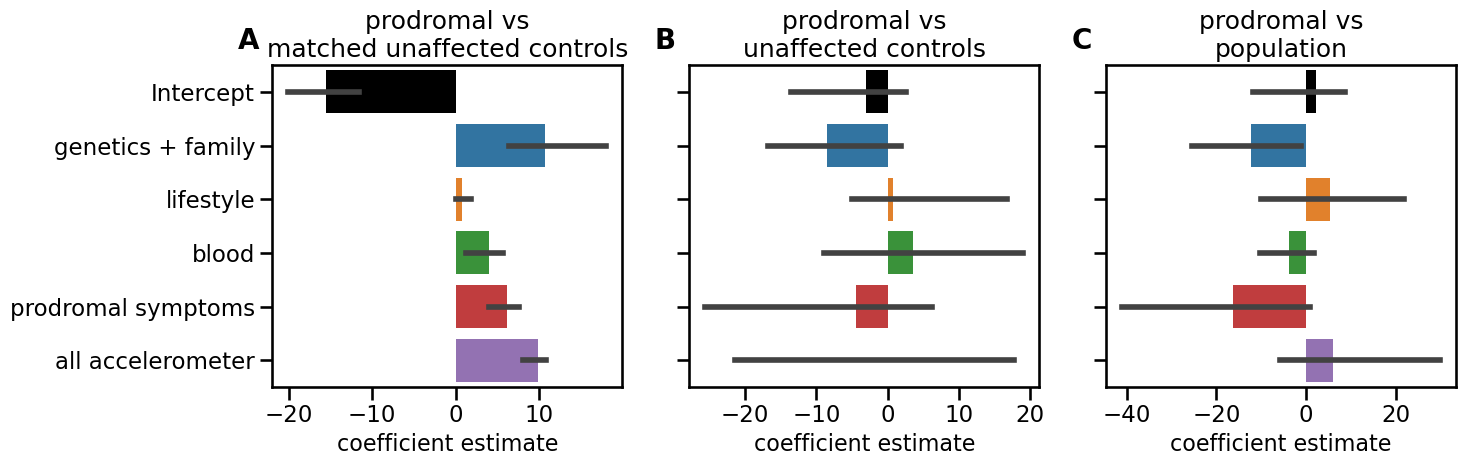

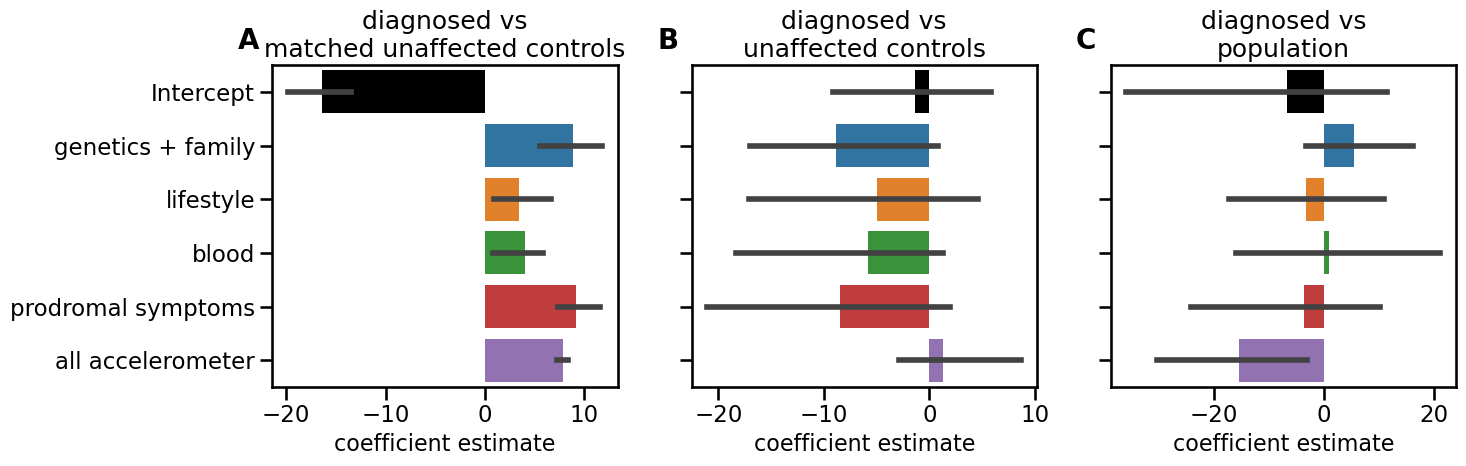

In [33]:
# stacked coefs
labels = ['A','B','C']
kinds = ['matched unaffected controls','unaffected controls','population']
cols = sns.color_palette("tab10")[:5]
cols.insert(0,(0,0,0))

cases = ['Prod','PD']
for (i,case),name in zip(enumerate(cases),['prodromal','diagnosed']):
    fig,axes = plt.subplots(ncols=3,figsize=(15,5),sharey=True)
    plots.plot_context()
    for diag,ax,label,kind in zip([f'{case}HC',f'{case}allHC',f'{case}PopulationNo{cases[(i+1)%2]}'],axes.flatten(),labels,kinds):
        if diag == 'ProdHC' or diag=='PDHC':
            path = f'{data_path}/all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD/{diag}_matched_stacked.csv'
        elif diag == 'ProdallHC' or diag=='PDallHC':
            path = f'{data_path}/all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD/{case}HC_allHC_stacked.csv'
        else:
            path = f'{data_path}/all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD/{diag}_allHC_stacked.csv'
        coefs = pd.read_csv(path,header=[0,1],index_col=0)
        temp = coefs.unstack().to_frame().reset_index()
        temp[0] = temp[0].astype(float)
        coef_pivot = pd.pivot_table(index = ['modality','level_2'], columns=['statistic'],values=0,data=temp).reset_index()
        coef_pivot['modality'] = coef_pivot['modality'].replace(['all_acc_features','prodromal_symptoms','genetics'],
                                                                ['all accelerometer','prodromal symptoms','genetics + family'])

        ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,ax=ax,
                        order=['Intercept','genetics + family','lifestyle','blood','prodromal symptoms','all accelerometer'],
                         palette=cols)
        ax.set_xlabel('coefficient estimate')
        ax.set_ylabel('')
        ax.set_title(f'{name} vs\n{kind}')
        ax.text(-0.1, 1.05,label, transform=ax.transAxes,size=20, weight='bold')
    plt.tight_layout()
    plt.savefig(f'{image_path}/{case}_stackedmodel_coefs.pdf',dpi=300,bbox_inches='tight')
    plt.savefig(f'{image_path}/{case}_stackedmodel_coefs.png',dpi=300,bbox_inches='tight')

diag_PDHC
diag_ProdHC
diag_PDProdHC
diag_PDPopulationNoProd
diag_ProdPopulationNoPD
diag_PDProdPopulation


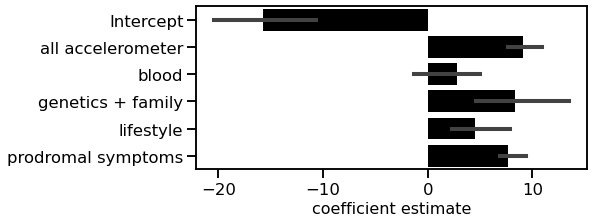

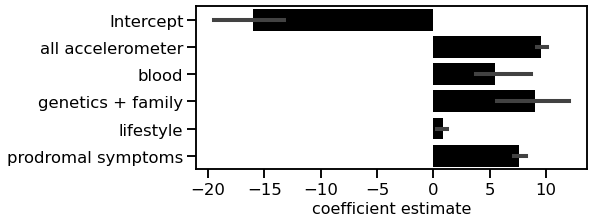

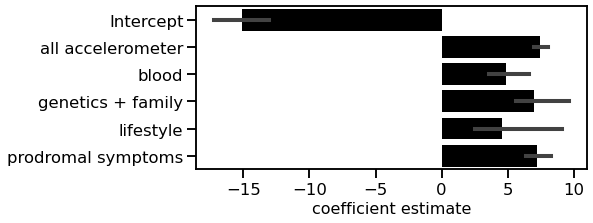

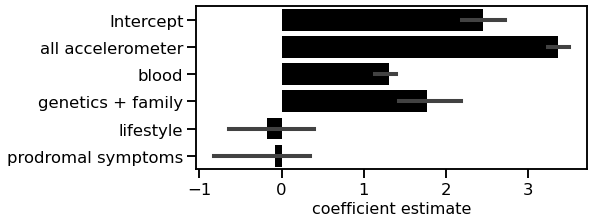

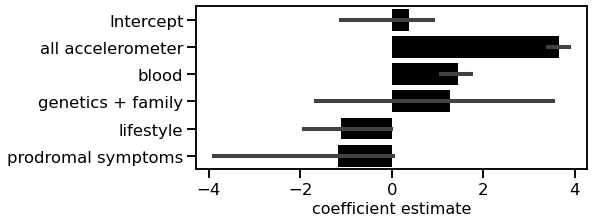

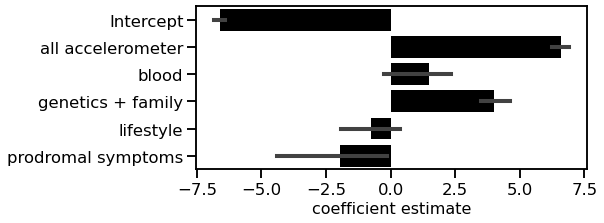

In [6]:
# stacked coefs
for diag in diags:
    print(diag)
    diag_name = diag.replace('diag_','')
    coefs = pd.read_csv(f'/scratch/c.c21013066/data/ukbiobank/analyses/acc_models/{diag_name}_stacked.csv',header=[0,1],index_col=0)
    temp = coefs.unstack().to_frame().reset_index()
    temp[0] = temp[0].astype(float)
    coef_pivot = pd.pivot_table(index = ['modality','level_2'], columns=['statistic'],values=0,data=temp).reset_index()
    coef_pivot['modality'] = coef_pivot['modality'].replace(['all_acc_features','prodromal_symptoms','genetics'],
                                                            ['all accelerometer','prodromal symptoms','genetics + family'])
    fig = plt.figure(figsize=(7,3))
    plots.plot_context()
    ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6)
    ax.set_xlabel('coefficient estimate')
    ax.set_ylabel('')
    plt.savefig(f'{image_path}/{diag}_stackedmodel_coefs.pdf',dpi=300,bbox_inches='tight')
    plt.savefig(f'{image_path}/{diag}_stackedmodel_coefs.png',dpi=300,bbox_inches='tight')

In [12]:
# of survival random forest
features = ['genetics+family','lifestyle_nofam','blood','prodromalsigns_beforeacc',
            'all_acc_features','all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforeacc']
for i,fname in enumerate(features):
    for cv in range(5):
        print(fname,cv)
        rsf = joblib.load(f'/scratch/c.c21013066/data/ukbiobank/analyses/survival/prodromal/{fname}/modelrsf_CV{cv}.joblib')
        print(rsf)

genetics+family 0


ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (/scratch/c.c21013066/docker/envs/py38R/lib/python3.8/site-packages/sklearn/utils/fixes.py)